# Import the file and information about dataset

In [1]:
import pandas as pd
import numpy as np
import os
import datetime as dt

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

In [2]:
os.getcwd()

'C:\\Users\\mcoge\\World-War-II-Aerial-Bombing'

In [3]:
df=pd.read_csv('operations.csv', low_memory=False)

### Content of te dataset

This dataset consists of digitized paper mission reports from WWII. Each record includes the date, conflict, geographic location, and other data elements to form a live-action sequence of air warfare from 1939 to 1945. The records include U.S. and Royal Air Force data, in addition to some Australian, New Zealand and South African air force missions.

In [4]:
df.head()

,Mission ID,Mission Date,Theater of Operations,Country,Air Force,Unit ID,Aircraft Series,Callsign,Mission Type,Takeoff Base,...,Incendiary Devices Weight (Tons),Fragmentation Devices,Fragmentation Devices Type,Fragmentation Devices Weight (Pounds),Fragmentation Devices Weight (Tons),Total Weight (Pounds),Total Weight (Tons),Time Over Target,Bomb Damage Assessment,Source ID
0,1,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN
1,2,8/15/1943,PTO,USA,5 AF,400 BS,B24,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,20.0,NaN,NaN,9366.0
2,3,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN
3,4,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,NaN,NaN,NaN,NaN,NaN,7.5,NaN,NaN,NaN
4,5,8/15/1943,PTO,USA,5 AF,321 BS,B24,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,22585.0


In [5]:
df.shape

(178281, 46)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178281 entries, 0 to 178280
Data columns (total 46 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Mission ID                             178281 non-null  int64  
 1   Mission Date                           178281 non-null  object 
 2   Theater of Operations                  175123 non-null  object 
 3   Country                                126494 non-null  object 
 4   Air Force                              126444 non-null  object 
 5   Unit ID                                50913 non-null   object 
 6   Aircraft Series                        178165 non-null  object 
 7   Callsign                               21 non-null      object 
 8   Mission Type                           47186 non-null   object 
 9   Takeoff Base                           3383 non-null    object 
 10  Takeoff Location                       3338 non-null    

In [7]:
(df.isna().sum()/df.shape[0]*100).round(2).sort_values(ascending = False)

Callsign                                 99.99
Aircraft Damaged                         99.98
Bomb Damage Assessment                   99.94
Aircraft Returned                        99.93
Aircraft Lost                            99.91
Fragmentation Devices Weight (Pounds)    99.89
Aircraft Failed                          99.86
Incendiary Devices Weight (Pounds)       99.80
Time Over Target                         99.61
High Explosives Weight (Pounds)          98.87
Total Weight (Pounds)                    98.81
Takeoff Latitude                         98.33
Takeoff Longitude                        98.33
Incendiary Devices                       98.16
Takeoff Location                         98.13
Takeoff Base                             98.10
Incendiary Devices Type                  96.90
Fragmentation Devices Type               96.77
Fragmentation Devices                    96.76
Fragmentation Devices Weight (Tons)      90.52
Incendiary Devices Weight (Tons)         85.57
High Explosiv

### First elements:
- There are 46 columns in this DataFrame
- 20 columns don't even have 10% of datas.
- 4 columns are ID. They won't be useful for analysis and can create biais. As they are object, and the objective is not to know which unit did the most missions, this will be dropped. 

In [8]:
df.columns

Index(['Mission ID', 'Mission Date', 'Theater of Operations', 'Country',
       'Air Force', 'Unit ID', 'Aircraft Series', 'Callsign', 'Mission Type',
       'Takeoff Base', 'Takeoff Location', 'Takeoff Latitude',
       'Takeoff Longitude', 'Target ID', 'Target Country', 'Target City',
       'Target Type', 'Target Industry', 'Target Priority', 'Target Latitude',
       'Target Longitude', 'Altitude (Hundreds of Feet)', 'Airborne Aircraft',
       'Attacking Aircraft', 'Bombing Aircraft', 'Aircraft Returned',
       'Aircraft Failed', 'Aircraft Damaged', 'Aircraft Lost',
       'High Explosives', 'High Explosives Type',
       'High Explosives Weight (Pounds)', 'High Explosives Weight (Tons)',
       'Incendiary Devices', 'Incendiary Devices Type',
       'Incendiary Devices Weight (Pounds)',
       'Incendiary Devices Weight (Tons)', 'Fragmentation Devices',
       'Fragmentation Devices Type', 'Fragmentation Devices Weight (Pounds)',
       'Fragmentation Devices Weight (Tons)', 'To

In [9]:
cols_to_remove=['Bomb Damage Assessment', 'Time Over Target', 'Total Weight (Pounds)',
                'Fragmentation Devices Weight (Pounds)','Fragmentation Devices Weight (Tons)',
                'Fragmentation Devices Type', 'Aircraft Returned', 'Aircraft Failed', 'Aircraft Damaged',
                'Aircraft Lost', 'High Explosives Weight (Pounds)', 'Incendiary Devices',
                'Incendiary Devices Type', 'Incendiary Devices Weight (Pounds)', 
                'Incendiary Devices Weight (Tons)', 'Fragmentation Devices', 'Callsign', 'Takeoff Base',
                'Takeoff Location', 'Takeoff Latitude', 'Takeoff Longitude', 'Mission ID', 'Unit ID',
                'Target ID', 'Source ID']

In [10]:
df.drop(cols_to_remove, axis=1, inplace =True)

In [11]:
df.head()

,Mission Date,Theater of Operations,Country,Air Force,Aircraft Series,Mission Type,Target Country,Target City,Target Type,Target Industry,...,Target Latitude,Target Longitude,Altitude (Hundreds of Feet),Airborne Aircraft,Attacking Aircraft,Bombing Aircraft,High Explosives,High Explosives Type,High Explosives Weight (Tons),Total Weight (Tons)
0,8/15/1943,MTO,USA,12 AF,A36,NaN,ITALY,SPADAFORA,NaN,NaN,...,38.220000,15.370000,NaN,20.0,NaN,20.0,40.0,500 LB GP (GP-M43/M64),10.0,10.0
1,8/15/1943,PTO,USA,5 AF,B24,1,NEW GUINEA,KOMIATUM,RIDGE,NaN,...,-7.166667,147.000000,44.0,NaN,6.0,NaN,40.0,1000 LB GP (GP-M44/M65),20.0,20.0
2,8/15/1943,MTO,USA,12 AF,A36,NaN,ITALY,COSENZA,NaN,NaN,...,39.270000,16.250000,NaN,18.0,NaN,36.0,36.0,500 LB GP (GP-M43/M64),9.0,9.0
3,8/15/1943,MTO,USA,12 AF,A36,NaN,ITALY,GIOJA TAURO,NaN,NaN,...,38.430000,15.900000,NaN,15.0,NaN,15.0,30.0,500 LB GP (GP-M43/M64),7.5,7.5
4,8/15/1943,PTO,USA,5 AF,B24,1,SUMATRA,KILA,VILLAGE,NaN,...,-1.116667,103.883333,60.0,NaN,6.0,NaN,16.0,1000 LB GP (GP-M44/M65),8.0,8.0


In [12]:
df1=df.copy()

## What to do with `Theater of Operations`, `Target Country`, `Target City` ?

As you can see from bombing paths, most of the bombing attack is done in European theater of operations. Theater of Operations:

    ETO: European Theater of Operations
    PTO: Pasific Theater of Operations
    MTO: Mediterranean Theater of Operations
    CBI: China-Burma-India Theater of Operations
    EAST AFRICA: East Africa Theater of Operations

In [13]:
df1['Theater of Operations'].value_counts()

ETO            95827
PTO            36192
MTO            30532
CBI            12404
EAST AFRICA      142
MADAGASCAR        26
Name: Theater of Operations, dtype: int64

In [14]:
df1['Theater of Operations'].isna().sum()/df1.shape[0]*100

1.7713609414351503

In [15]:
df1['Target Country'].value_counts()

GERMANY                    61744
ITALY                      23689
FRANCE                     22226
BURMA                       8259
PHILIPPINE ISLANDS          8180
                           ...  
TURKEY                         1
INDIAN OCEAN                   1
NETHERLANDS EAST INDIES        1
MOROCCO                        1
FORMOSA                        1
Name: Target Country, Length: 90, dtype: int64

In [16]:
df1['Target Country'].isna().sum()/df1.shape[0]*100

0.33598644835961206

In [17]:
df1['Target City'].value_counts()

UNIDENTIFIED              3518
BERLIN                    2546
HAMBURG                   1951
UNKNOWN                   1950
COLOGNE                   1907
                          ... 
KULON PLANTATIO              1
WAW VILLAGE                  1
KOMARNO                      1
PORTON                       1
N OF GOODENOUGH ISLAND       1
Name: Target City, Length: 10085, dtype: int64

In [18]:
df1['Target City'].isna().sum()/df1.shape[0]*100

1.2693444618327248

In [19]:
df1[df1['Target City']=='CAEN']['Theater of Operations'].value_counts()

ETO    210
Name: Theater of Operations, dtype: int64

In [20]:
df1[df1['Target City']=='CAEN']['Target Country'].value_counts()

FRANCE    210
Name: Target Country, dtype: int64

Each `Target City` have a specific `Target Country` and a specific `Theater of Operations`. So for example, the city of Caen have a unique Country and a unique Theater of Operations. And it's the same for every single city, so it's better to drop the columns `Theater of Operations` and `Target Country`. But `Target Country` will also be used to create maps, so the deletion will at the end of the datacleaning part.

For the NaNs value in `Target City`, the rows will be dropped.

In [21]:
df1.drop(['Theater of Operations'], axis=1, inplace=True)

In [22]:
df1['Target City'].isna().sum()

2263

In [23]:
df1['Target City'].dropna(inplace=True)

## Attacking countries and Air Forces

In [24]:
df1.Country.value_counts()/df.shape[0]

USA              0.528183
GREAT BRITAIN    0.175908
NEW ZEALAND      0.003551
AUSTRALIA        0.001772
SOUTH AFRICA     0.000107
Name: Country, dtype: float64

In [25]:
df1.Country.isna().sum()/df1.shape[0]

0.29047963608012073

In [26]:
df1[df1.Country.isna()].head()

,Mission Date,Country,Air Force,Aircraft Series,Mission Type,Target Country,Target City,Target Type,Target Industry,Target Priority,Target Latitude,Target Longitude,Altitude (Hundreds of Feet),Airborne Aircraft,Attacking Aircraft,Bombing Aircraft,High Explosives,High Explosives Type,High Explosives Weight (Tons),Total Weight (Tons)
13,8/15/1943,NaN,NaN,B17,NaN,HOLLAND OR NETHERLANDS,FLUSHING,NaN,AIR FIELDS AND AIRDROMES,2,51.4,3.53,245.0,NaN,NaN,NaN,NaN,NaN,39.0,39.0
14,8/15/1943,NaN,NaN,B17,NaN,HOLLAND OR NETHERLANDS,FLUSHING,NaN,AIR FIELDS AND AIRDROMES,2,51.4,3.53,245.0,NaN,NaN,NaN,NaN,NaN,39.0,39.0
15,8/15/1943,NaN,NaN,B17,NaN,HOLLAND OR NETHERLANDS,FLUSHING,NaN,AIR FIELDS AND AIRDROMES,2,51.4,3.53,245.0,NaN,NaN,NaN,NaN,NaN,39.0,39.0
16,8/15/1943,NaN,NaN,B17,NaN,FRANCE,AMIENS,AIRDROME,AIR FIELDS AND AIRDROMES,1,49.9,2.30,240.0,NaN,NaN,NaN,NaN,NaN,5.0,5.0
17,8/15/1943,NaN,NaN,B17,NaN,FRANCE,AMIENS,AIRDROME,AIR FIELDS AND AIRDROMES,1,49.9,2.30,240.0,NaN,NaN,NaN,NaN,NaN,5.0,5.0


Instead of dropping rows in Country, it can be replaced by Allies. 

In [27]:
df1['Country'].fillna(value='ALLIES', inplace=True)

In [28]:
df1.Country.isna().sum()

0

In [29]:
df1['Air Force'].value_counts()

RAF         31361
5 AF        19027
12 AF       18748
8 AF        10385
9 AF         9034
15 AF        8700
10 AF        6922
13 AF        6657
7 AF         6564
14 AF        4593
20 AF        2518
RNZAF         633
1 TAC         553
11 AF         414
RAAF          315
SAAF           19
RAAF/NEI        1
Name: Air Force, dtype: int64

In [30]:
df1[df1['Air Force']=='RAF']['Country'].value_counts()

GREAT BRITAIN    31361
Name: Country, dtype: int64

In [31]:
df1[df1['Air Force']=='SAAF']['Country'].value_counts()

SOUTH AFRICA    19
Name: Country, dtype: int64

In [32]:
df1[df1['Air Force']=='RNZAF']['Country'].value_counts()

NEW ZEALAND    633
Name: Country, dtype: int64

In [33]:
df1['Country'].value_counts()

USA              94165
ALLIES           51787
GREAT BRITAIN    31361
NEW ZEALAND        633
AUSTRALIA          316
SOUTH AFRICA        19
Name: Country, dtype: int64

`Air Force` columns is highly linked to the Country columns : `RAF` is the Royal Air Force, which corresponds to `GREAT BRITAIN` in the column `Country`, `RNZAF` is for `New Zealand`, etc. The only difference is for USA where the Air Forces are specified by their number. But in the end, if the US Air Forces are grouped by the `Country`, it will create collinearity during the modelling. So, even it's still interesting, this has to be dropped.

In [34]:
df1.drop('Air Force', axis=1, inplace=True)

## Aircrafts

### Modify the `Aircraft Series` column

In [35]:
df1['Aircraft Series'].value_counts()

B24              33837
B17              31448
B25              17359
A20              12561
B26              11980
                 ...  
BISLEY               1
P45                  1
236/330 WINGS        1
100 SQ               1
35 FG                1
Name: Aircraft Series, Length: 74, dtype: int64

In [36]:
df1['Aircraft Series'].isna().sum()

116

There are many differnt types of aircrafts `74`, and it seems to be a lot. But let's see if we can reduce in prevision of the machine learning part. After creating this `OTHER` value, the NaNs will be dropped.

In [37]:
print((sum(df1['Aircraft Series'].value_counts()[:5])/df1.shape[0])*100)
print((sum(df1['Aircraft Series'].value_counts()[:10])/df1.shape[0])*100)
print((sum(df1['Aircraft Series'].value_counts()[:15])/df1.shape[0])*100)
print((sum(df1['Aircraft Series'].value_counts()[:20])/df1.shape[0])*100)

60.12138141473292
77.62689237776318
87.31721271475928
95.11333232369125


In [38]:
aircraft_remove=df1['Aircraft Series'].value_counts()[15:].index.to_list()
df1['Aircraft Series'] = np.where(df1['Aircraft Series'].isin(aircraft_remove),'OTHER',df1['Aircraft Series'])

In [39]:
df1['Aircraft Series'].value_counts()

B24      33837
B17      31448
OTHER    22495
B25      17359
A20      12561
B26      11980
GB17      9124
WELL      6391
HVY       6298
A26       4736
P47       4660
LGT       3673
P51       3623
HAMP      3552
BLEN      3223
WHIT      3205
Name: Aircraft Series, dtype: int64

In [40]:
df1.dropna(subset=['Aircraft Series'],inplace=True)

In [41]:
df1.isna().sum()/df1.shape[0]

Mission Date                     0.000000
Country                          0.000000
Aircraft Series                  0.000000
Mission Type                     0.735195
Target Country                   0.003306
Target City                      0.012696
Target Type                      0.178660
Target Industry                  0.290102
Target Priority                  0.243858
Target Latitude                  0.048859
Target Longitude                 0.048983
Altitude (Hundreds of Feet)      0.321842
Airborne Aircraft                0.538439
Attacking Aircraft               0.298021
Bombing Aircraft                 0.541998
High Explosives                  0.805080
High Explosives Type             0.764640
High Explosives Weight (Tons)    0.179452
Total Weight (Tons)              0.065630
dtype: float64

## Is Mission Type useful?

In [42]:
df1['Mission Type'].value_counts()

1             27697
10            14885
12             2255
6              1083
99              391
5               216
17              206
3               194
2               102
8                41
11               30
7                18
4                12
30                7
18                6
13                6
15                5
9                 4
B17               3
95                2
55                2
31                2
40                2
19                2
20                1
WELLINGTON        1
32                1
24                1
16                1
41                1
P38               1
BEAUFORT          1
Name: Mission Type, dtype: int64

The column `Mission Type` contains only numbers. As there is not information of the utility and there is 73% of NaNs, it's better to drop this columns and go to the next task.

In [43]:
df1.drop(['Mission Type'], axis=1, inplace=True)

### Modifcation of the `Attacking Aircraft`, `Airborne Aircraft`, `Bombing Aircraft` columns

In [44]:
print(df1['Attacking Aircraft'].isna().sum()/df1.shape[0])
print(df1['Airborne Aircraft'].isna().sum()/df1.shape[0])
print(df1['Bombing Aircraft'].isna().sum()/df1.shape[0])

0.29802149692700586
0.5384390873628379
0.5419975865068897


In [45]:
df1[['Airborne Aircraft','Attacking Aircraft','Bombing Aircraft']].sample(20)

,Airborne Aircraft,Attacking Aircraft,Bombing Aircraft
145128,NaN,NaN,NaN
115983,29.0,29.0,29.0
169440,0.0,NaN,NaN
114575,NaN,4.0,NaN
80117,NaN,NaN,NaN
17147,NaN,NaN,NaN
44306,6.0,6.0,6.0
140647,NaN,6.0,NaN
10665,NaN,NaN,NaN
87874,21.0,21.0,21.0


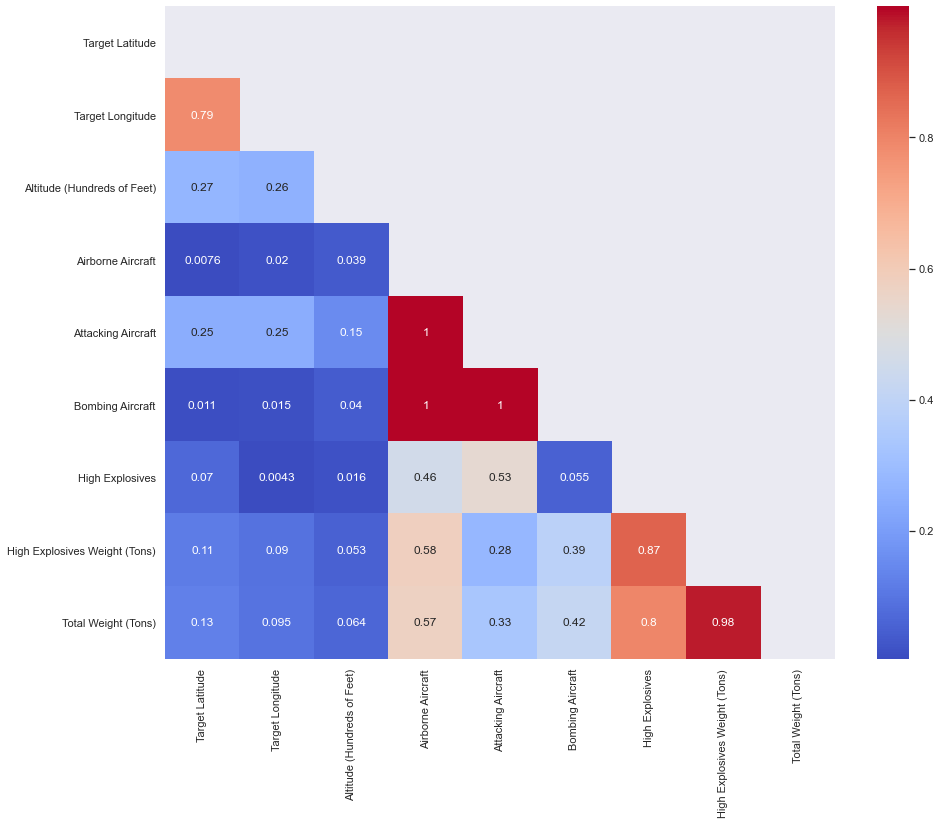

In [46]:
corr_matrix = df1.corr().abs()
plt.figure(figsize=(15, 12))
mask = np.triu(corr_matrix)
sns.heatmap(corr_matrix, 
            annot=True, 
            cmap= 'coolwarm',
            mask=mask)
plt.show()

By sampling the 3 columns, we can see they have generally the same value (when there are value in them). 
As there is more datas in `Attacking Aircraft` than in `Airborne Aircraft` and `Bombing Aircraft` and they are highly correlated. 
1. Fill NaNs values in `Attacking Aircraft` with the 2 others columns.
2. Drop `Airborne Aircraft` and `Bombing Aircraft` columns.

In [47]:
df1['Attacking Aircraft'].isna().sum()

53097

In [48]:
df1['Attacking Aircraft']=df1['Attacking Aircraft'].fillna(df1['Airborne Aircraft'])
df1['Attacking Aircraft']=df1['Attacking Aircraft'].fillna(df1['Bombing Aircraft'])

In [49]:
df1['Attacking Aircraft'].isna().sum()

51853

In [50]:
print (53097-51853, 'missing values have been filled with the 2 other columns. Now it\'s possible to drop them.')

1244 missing values have been filled with the 2 other columns. Now it's possible to drop them.


In [51]:
df1.drop(['Airborne Aircraft', 'Bombing Aircraft'], axis=1, inplace=True)

It's impossible to interpolate datas in the column, there are 2 options:
1. dropna (which will be 30% of total rows).
2. replace it by the median which is 7.0

Let's `dropna` !

In [52]:
df1.dropna(subset=['Attacking Aircraft'],inplace=True)

In [53]:
df1['Attacking Aircraft'].isna().sum()

0

In [54]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126312 entries, 0 to 178280
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Mission Date                   126312 non-null  object 
 1   Country                        126312 non-null  object 
 2   Aircraft Series                126312 non-null  object 
 3   Target Country                 125793 non-null  object 
 4   Target City                    124865 non-null  object 
 5   Target Type                    105787 non-null  object 
 6   Target Industry                78618 non-null   object 
 7   Target Priority                106587 non-null  object 
 8   Target Latitude                120129 non-null  float64
 9   Target Longitude               120108 non-null  float64
 10  Altitude (Hundreds of Feet)    92242 non-null   float64
 11  Attacking Aircraft             126312 non-null  float64
 12  High Explosives               

In [55]:
(df1.isna().sum()/df1.shape[0])*100

Mission Date                      0.000000
Country                           0.000000
Aircraft Series                   0.000000
Target Country                    0.410887
Target City                       1.145576
Target Type                      16.249446
Target Industry                  37.758883
Target Priority                  15.616093
Target Latitude                   4.895022
Target Longitude                  4.911647
Altitude (Hundreds of Feet)      26.972893
Attacking Aircraft                0.000000
High Explosives                  74.545570
High Explosives Type             69.307746
High Explosives Weight (Tons)    16.137026
Total Weight (Tons)               4.172208
dtype: float64

## Target Priority

In [56]:
df1['Target Priority'].isna().sum()/df1.shape[0]

0.15616093482804483

In [57]:
df1['Target Priority'].value_counts()[:7]

1    79441
2    12410
3     9839
4     2337
9     2028
P      395
5       28
Name: Target Priority, dtype: int64

In [58]:
sum(df1['Target Priority'].value_counts()[:4])/df1.shape[0]

0.823571790487048

Works like a categorical value: every value represents a different category.

First 4 types of priority represents 74% of the total. Everything else (including NaN) will be `5`

In [59]:
priority_remove=df1['Target Priority'].value_counts()[4:].index.to_list()
df1['Target Priority'] = np.where(df1['Target Priority'].isin(priority_remove),'5',df1['Target Priority'])

In [60]:
df1['Target Priority'].isna().sum()

19725

In [61]:
df1['Target Priority'].fillna('5', inplace=True)

In [62]:
df1['Target Priority'].value_counts()

1    79441
5    22285
2    12410
3     9839
4     2337
Name: Target Priority, dtype: int64

In [63]:
df1.isna().sum()

Mission Date                         0
Country                              0
Aircraft Series                      0
Target Country                     519
Target City                       1447
Target Type                      20525
Target Industry                  47694
Target Priority                      0
Target Latitude                   6183
Target Longitude                  6204
Altitude (Hundreds of Feet)      34070
Attacking Aircraft                   0
High Explosives                  94160
High Explosives Type             87544
High Explosives Weight (Tons)    20383
Total Weight (Tons)               5270
dtype: int64

## Explosives

In [64]:
df1['High Explosives']

0         40.000000
1         40.000000
2         36.000000
3         30.000000
4         16.000000
            ...    
178276     8.000000
178277     8.000000
178278     8.000000
178279     8.000000
178280     6.153846
Name: High Explosives, Length: 126312, dtype: float64

In [65]:
df1['High Explosives Type']

0          500 LB GP (GP-M43/M64)
1         1000 LB GP (GP-M44/M65)
2          500 LB GP (GP-M43/M64)
3          500 LB GP (GP-M43/M64)
4         1000 LB GP (GP-M44/M65)
                   ...           
178276         250 LB GP (GP-M57)
178277         250 LB GP (GP-M57)
178278         250 LB GP (GP-M57)
178279    1000 LB GP (GP-M44/M65)
178280    325 LB DC (DB-MK 17/47)
Name: High Explosives Type, Length: 126312, dtype: object

In [66]:
df1['High Explosives Weight (Tons)']

0         10.0
1         20.0
2          9.0
3          7.5
4          8.0
          ... 
178276     1.0
178277     1.0
178278     1.0
178279     4.0
178280     1.0
Name: High Explosives Weight (Tons), Length: 126312, dtype: float64

In [67]:
df1['Total Weight (Tons)']

0         10.0
1         20.0
2          9.0
3          7.5
4          8.0
          ... 
178276     1.0
178277     1.0
178278     1.0
178279     4.0
178280     1.0
Name: Total Weight (Tons), Length: 126312, dtype: float64

In [68]:
df1[['High Explosives', 'High Explosives Type', 'High Explosives Weight (Tons)', 'Total Weight (Tons)']]

,High Explosives,High Explosives Type,High Explosives Weight (Tons),Total Weight (Tons)
0,40.000000,500 LB GP (GP-M43/M64),10.0,10.0
1,40.000000,1000 LB GP (GP-M44/M65),20.0,20.0
2,36.000000,500 LB GP (GP-M43/M64),9.0,9.0
3,30.000000,500 LB GP (GP-M43/M64),7.5,7.5
4,16.000000,1000 LB GP (GP-M44/M65),8.0,8.0
...,...,...,...,...
178276,8.000000,250 LB GP (GP-M57),1.0,1.0
178277,8.000000,250 LB GP (GP-M57),1.0,1.0
178278,8.000000,250 LB GP (GP-M57),1.0,1.0
178279,8.000000,1000 LB GP (GP-M44/M65),4.0,4.0


In [69]:
df1[['High Explosives', 'High Explosives Type', 'High Explosives Weight (Tons)', 'Total Weight (Tons)']].corr()

,High Explosives,High Explosives Weight (Tons),Total Weight (Tons)
High Explosives,1.000000,0.869767,0.798628
High Explosives Weight (Tons),0.869767,1.000000,0.986634
Total Weight (Tons),0.798628,0.986634,1.000000


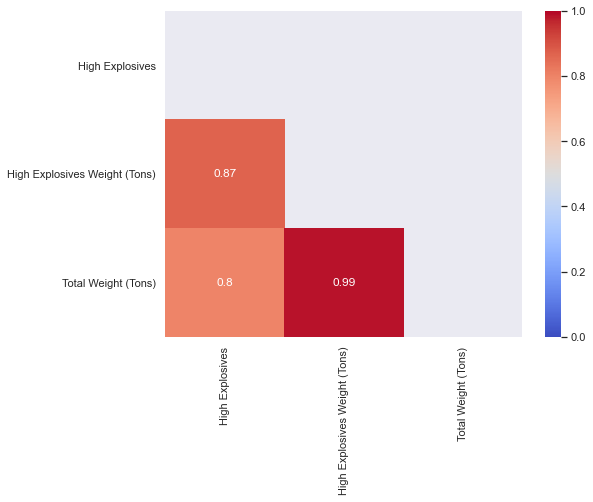

In [70]:
corr_matrix = df1[['High Explosives', 'High Explosives Type', 'High Explosives Weight (Tons)', 'Total Weight (Tons)']].corr().abs()
plt.figure(figsize=(8, 6))
mask = np.triu(corr_matrix)
sns.heatmap(corr_matrix,
            vmin=0,
            vmax=1,
            annot=True, 
            cmap= 'coolwarm',
            mask=mask)
plt.show()

##### df1['High Explosives Type'].value_counts()

In [71]:
df1[['High Explosives', 'High Explosives Type', 'High Explosives Weight (Tons)', 'Total Weight (Tons)']].isna().sum()

High Explosives                  94160
High Explosives Type             87544
High Explosives Weight (Tons)    20383
Total Weight (Tons)               5270
dtype: int64

In [72]:
df1[['High Explosives Weight (Tons)', 'Total Weight (Tons)']].sample(20)

,High Explosives Weight (Tons),Total Weight (Tons)
21610,1.0,1.0
107761,36.0,36.0
76013,2.0,2.0
155371,3.0,3.0
34008,7.0,7.0
131214,9.0,9.0
108713,NaN,1.0
122193,NaN,NaN
171895,5.0,5.0
135883,4.0,4.0


1. Drop `High Explosives Type` column
2. Very high correlation between the 3 numerical columns. The best thing to do is to drop `High Explosives` which have too much missing values.
3. After looking at the first 50 rows, `High Explosives Weight (Tons)` and `Total Weight (Tons)` are almost identical. The only difference is that there are less NaNs in `Total Weight (Tons)`. So it will be better to choose `Total Weight (Tons)`. First `High Explosives Weight (Tons)` can be used to fill some NaNs, after the other one will be dropped.
4. The rows with NaNs value in this column will be dropped.

In [73]:
df1[['Total Weight (Tons)']].isna().sum()

Total Weight (Tons)    5270
dtype: int64

In [74]:
df1['Total Weight (Tons)']=df1['Total Weight (Tons)'].fillna(df1['High Explosives Weight (Tons)'])

In [75]:
df1[['Total Weight (Tons)']].isna().sum()

Total Weight (Tons)    5236
dtype: int64

In [76]:
df1.drop(['High Explosives', 'High Explosives Type', 'High Explosives Weight (Tons)'], axis=1, inplace=True)

In [77]:
df1.rename(columns={'Total Weight (Tons)': 'Tons of explosives'}, inplace=True)

In [78]:
df1=df1.dropna(subset = ['Tons of explosives'])

In [79]:
df1.isna().sum()/df1.shape[0]*100

Mission Date                    0.000000
Country                         0.000000
Aircraft Series                 0.000000
Target Country                  0.399749
Target City                     0.980376
Target Type                    16.285639
Target Industry                37.222901
Target Priority                 0.000000
Target Latitude                 4.687139
Target Longitude                4.704483
Altitude (Hundreds of Feet)    26.202550
Attacking Aircraft              0.000000
Tons of explosives              0.000000
dtype: float64

## `Target Type` and `Target Industry`

In [80]:
df1['Target Type'].value_counts()[:20]

UNIDENTIFIED TARGET    16789
AIRDROME               12426
CITY AREA               9248
MARSHALLING YARD        3138
BRIDGE                  2281
TOWN                    1811
OIL REFINERY            1690
AREA                    1457
AIRFIELD                1439
MARSHALLING YARDS       1241
URBAN AREA               934
LEUNA SYN OIL PLANT      929
SHIPPING                 816
HENSCHEL TANK WORKS      798
GUN EMPLACEMENTS         742
GUN POSITIONS            742
RR BRIDGE                722
TACTICAL TARGET          711
TROOP CONCENTRATION      685
TROOPS                   665
Name: Target Type, dtype: int64

In [81]:
df1['Target Type'].isna().sum()/df1.shape[0]

0.1628563877234134

In [82]:
df1['Target Industry'].value_counts()

CITIES TOWNS AND URBAN AREAS                                                                                                 10744
"RR INSTALLATIONS,  TRACKS,  MARSHALLING YARDS,  AND STATIONS"                                                               10631
AIR FIELDS AND AIRDROMES                                                                                                     10229
UNIDENTIFIED TARGETS                                                                                                          6286
BRIDGES                                                                                                                       5070
TACTICAL TARGETS: (UNIDENTIFIED OR NOT LISTED BELOW)                                                                          3341
SYNTHETIC OIL REFINERIES                                                                                                      2888
GUN EMPLACEMENTS                                                                   

`Target Industry` seems to be more structured than `Target Type`. So the second column will be dropped.
To make it easier to use with the dummies. The number of differents values will be reduced to 20. The other will be replaced by `OTHER`.

In [83]:
df1['Target Industry'].isna().sum()/df1.shape[0]

0.3722290131818032

In [84]:
sum(df1['Target Industry'].value_counts()[:25])/df1.shape[0]

0.5973438171066108

In [85]:
sum(df1['Target Industry'].value_counts()[:35])/df1.shape[0]

0.6224107172354554

In [86]:
df1.shape

(121076, 13)

In [87]:
df1.dropna(subset=['Target Industry'], inplace=True)

In [88]:
df1.replace({'"RR INSTALLATIONS,  TRACKS,  MARSHALLING YARDS,  AND STATIONS"':'RAILROAD',
'CITIES TOWNS AND URBAN AREAS':'CITY',
'AIR FIELDS AND AIRDROMES':'AIRFIELD',
'AIRCRAFT FACTORIES AND ASSEMBLY PLANTS':'FACTORY',
'TACTICAL TARGETS: (UNIDENTIFIED OR NOT LISTED BELOW)':'TACTICAL TARGET',
'SYNTHETIC OIL REFINERIES':'OIL REFINERY',
'TANK FACTORIES':'FACTORY',
'OIL REFINERIES':'OIL REFINERY',
'SUPPLY DUMPS AND WAREHOUSES':'WAREHOUSE',
'SUBMARINE PENS AND YARDS':'SUBMARINE BASE',
'PORTS AND HARBORS':'PORT',
'HIGHWAYS AND VEHICLES':'ROAD',
'VEHICLE MFG. PLANTS':'FACTORY',
'GUN EMPLACEMENTS':'GUN EMPLACEMENT',
'TROOP CONCENTRATIONS':'TROOPS',
'WATERWAYS AND BOATS':'BOAT',
'ARMAMENT AND ORDNANCE PLANTS':'FACTORY',
'ENGINE PLANTS':'FACTORY'}, inplace=True)

In [89]:
df1['Target Industry'].value_counts()[:15]/df1.shape[0]*100

CITY                          14.135354
RAILROAD                      13.986686
AIRFIELD                      13.457794
UNIDENTIFIED TARGETS           8.270182
FACTORY                        7.647879
BRIDGES                        6.670350
OIL REFINERY                   6.271708
TACTICAL TARGET                4.395590
GUN EMPLACEMENT                3.100989
PORT                           2.882591
WAREHOUSE                      2.316861
V - WEAPON LAUNCHING SITES     1.915588
CHEMICAL PLANTS                1.724818
NATURAL OIL REFINERIES         1.422219
ROAD                           1.402484
Name: Target Industry, dtype: float64

In [90]:
sum(df1['Target Industry'].value_counts()[:15])/df1.shape[0]*100

89.60109462161878

In [91]:
industry_remove=df1['Target Industry'].value_counts()[15:].index.to_list()
df1['Target Industry'] = np.where(df1['Target Industry'].isin(industry_remove),'OTHER',df1['Target Industry'])

In [92]:
df1['Target Industry'].value_counts()[:15]

CITY                          10744
RAILROAD                      10631
AIRFIELD                      10229
OTHER                          7904
UNIDENTIFIED TARGETS           6286
FACTORY                        5813
BRIDGES                        5070
OIL REFINERY                   4767
TACTICAL TARGET                3341
GUN EMPLACEMENT                2357
PORT                           2191
WAREHOUSE                      1761
V - WEAPON LAUNCHING SITES     1456
CHEMICAL PLANTS                1311
NATURAL OIL REFINERIES         1081
Name: Target Industry, dtype: int64

In [93]:
df1.drop(['Target Type'], axis=1, inplace=True)

In [94]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76008 entries, 9 to 178200
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Mission Date                 76008 non-null  object 
 1   Country                      76008 non-null  object 
 2   Aircraft Series              76008 non-null  object 
 3   Target Country               76006 non-null  object 
 4   Target City                  74840 non-null  object 
 5   Target Industry              76008 non-null  object 
 6   Target Priority              76008 non-null  object 
 7   Target Latitude              70408 non-null  float64
 8   Target Longitude             70408 non-null  float64
 9   Altitude (Hundreds of Feet)  50731 non-null  float64
 10  Attacking Aircraft           76008 non-null  float64
 11  Tons of explosives           76008 non-null  float64
dtypes: float64(5), object(7)
memory usage: 7.5+ MB


## Convert datetime

In [95]:
df1['Mission Date']=pd.to_datetime(df1['Mission Date'])

In [96]:
df1.sample(20)

,Mission Date,Country,Aircraft Series,Target Country,Target City,Target Industry,Target Priority,Target Latitude,Target Longitude,Altitude (Hundreds of Feet),Attacking Aircraft,Tons of explosives
74788,1944-10-19,ALLIES,GB17,GERMANY,MANNHEIM,FACTORY,2,49.48,8.47,NaN,4.0,12.0
98017,1944-11-16,ALLIES,GB17,GERMANY,DUREN,TACTICAL TARGET,1,50.80,6.48,226.0,3.0,8.0
126086,1942-08-04,GREAT BRITAIN,HVY,GERMANY,FREFELD,CITY,5,51.33,6.37,NaN,1.0,3.0
98889,1941-08-14,GREAT BRITAIN,HAMP,GERMANY,MUNSTER,CITY,5,50.13,8.46,NaN,1.0,1.0
50609,1940-08-19,GREAT BRITAIN,WELL,GERMANY,JAGEL,AIRFIELD,5,54.45,9.53,NaN,1.0,1.0
15791,1944-08-13,ALLIES,B17,ITALY,SAVONA,GUN EMPLACEMENT,1,44.30,8.50,190.0,28.0,83.0
17530,1944-08-14,ALLIES,B24,ITALY,SAVONA,GUN EMPLACEMENT,1,44.30,8.50,190.0,30.0,90.0
125255,1942-07-26,GREAT BRITAIN,OTHER,GERMANY,HELIGOLAND,CITY,5,54.18,7.92,NaN,1.0,1.0
45314,1944-02-19,USA,B25,ITALY,45 00 N 011 00 E,OTHER,1,45.00,11.00,105.0,23.0,15.0
67643,1945-04-07,ALLIES,OTHER,GERMANY,KRUMMEL,OTHER,1,53.42,10.42,NaN,1.0,3.0


In [97]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76008 entries, 9 to 178200
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Mission Date                 76008 non-null  datetime64[ns]
 1   Country                      76008 non-null  object        
 2   Aircraft Series              76008 non-null  object        
 3   Target Country               76006 non-null  object        
 4   Target City                  74840 non-null  object        
 5   Target Industry              76008 non-null  object        
 6   Target Priority              76008 non-null  object        
 7   Target Latitude              70408 non-null  float64       
 8   Target Longitude             70408 non-null  float64       
 9   Altitude (Hundreds of Feet)  50731 non-null  float64       
 10  Attacking Aircraft           76008 non-null  float64       
 11  Tons of explosives           76008 non-n

## Reduce the number of `Target City`

In [98]:
df1['Target City'].isna().sum()

1168

In [99]:
df1.dropna(subset=['Target City'], inplace=True)

In [100]:
df1.isna().sum()

Mission Date                       0
Country                            0
Aircraft Series                    0
Target Country                     2
Target City                        0
Target Industry                    0
Target Priority                    0
Target Latitude                 4438
Target Longitude                4438
Altitude (Hundreds of Feet)    24417
Attacking Aircraft                 0
Tons of explosives                 0
dtype: int64

In [101]:
df1['Target City'].value_counts()

UNIDENTIFIED    2620
BERLIN          1763
HAMBURG         1275
COLOGNE         1201
UNKNOWN         1158
                ... 
OTTBERGEN          1
CETRARO            1
KONIGSFELD         1
DIXMUDE            1
GIOJA TAURO        1
Name: Target City, Length: 3215, dtype: int64

In [102]:
sum(df1['Target City'].value_counts()[:500])/df1.shape[0]

0.7564537680384821

In [103]:
test=df1.copy()

In [104]:
city_remove=test['Target City'].value_counts()[500:].index.to_list()
test['Target City'] = np.where(test['Target City'].isin(city_remove),'OTHER',test['Target City'])

In [105]:
test['Target City'].value_counts()

OTHER                18227
UNIDENTIFIED          2620
BERLIN                1763
HAMBURG               1275
COLOGNE               1201
                     ...  
MESTRO                  30
CASALE MONFERRATO       30
ERDING                  30
LUNEBURG                30
EL GUETTAR              29
Name: Target City, Length: 501, dtype: int64

## `Altitude`

In [106]:
df1['Altitude (Hundreds of Feet)'].value_counts()

250.0    1966
220.0    1745
230.0    1673
240.0    1505
210.0    1424
         ... 
0.0         1
16.0        1
39.0        1
335.0       1
42.0        1
Name: Altitude (Hundreds of Feet), Length: 308, dtype: int64

In [107]:
df1['Altitude (Hundreds of Feet)'].isna().sum()

24417

In [108]:
df1['Altitude (Hundreds of Feet)'].describe()

count    50423.000000
mean       196.062095
std         68.192045
min          0.000000
25%        145.000000
50%        220.000000
75%        249.000000
max        465.000000
Name: Altitude (Hundreds of Feet), dtype: float64

In [109]:
df1.dropna(subset=['Altitude (Hundreds of Feet)'], inplace=True)

In [110]:
df1.isna().sum()

Mission Date                      0
Country                           0
Aircraft Series                   0
Target Country                    2
Target City                       0
Target Industry                   0
Target Priority                   0
Target Latitude                1834
Target Longitude               1834
Altitude (Hundreds of Feet)       0
Attacking Aircraft                0
Tons of explosives                0
dtype: int64

# Outliers detection and treatment

In [111]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50423 entries, 12 to 178199
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Mission Date                 50423 non-null  datetime64[ns]
 1   Country                      50423 non-null  object        
 2   Aircraft Series              50423 non-null  object        
 3   Target Country               50421 non-null  object        
 4   Target City                  50423 non-null  object        
 5   Target Industry              50423 non-null  object        
 6   Target Priority              50423 non-null  object        
 7   Target Latitude              48589 non-null  float64       
 8   Target Longitude             48589 non-null  float64       
 9   Altitude (Hundreds of Feet)  50423 non-null  float64       
 10  Attacking Aircraft           50423 non-null  float64       
 11  Tons of explosives           50423 non-

<AxesSubplot:xlabel='Altitude (Hundreds of Feet)'>

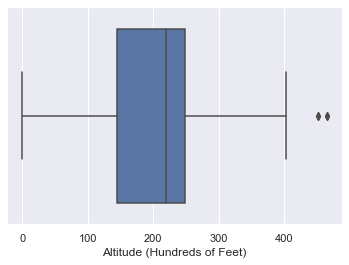

In [112]:
sns.boxplot(df1["Altitude (Hundreds of Feet)"])

<AxesSubplot:xlabel='Attacking Aircraft'>

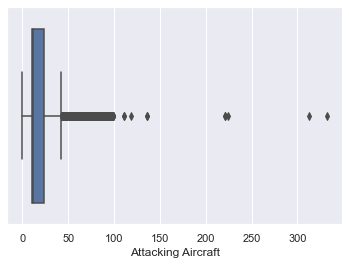

In [113]:
sns.boxplot(df1["Attacking Aircraft"])

<AxesSubplot:xlabel='Tons of explosives'>

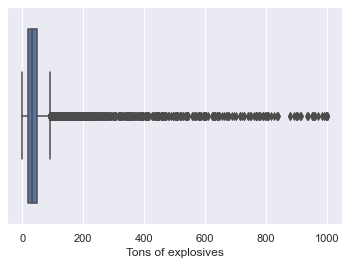

In [114]:
sns.boxplot(df1["Tons of explosives"])

In [115]:
summary_Z=df1.describe().T
#get left and right bounds
summary_Z['lbound']=summary_Z['mean']-3*summary_Z['std']
summary_Z['rbound']=summary_Z['mean']+3*summary_Z['std']
outliers_Z=pd.DataFrame(columns=df1.columns)
#loop to detect outliers in each column
for col in summary_Z.index:
    lower=summary_Z.at[col,'lbound'] #get lower whisker for this column
    upper=summary_Z.at[col,'rbound'] #get upper whisker for this column
    results=df1[(df1[col]<lower)|
                 (df1[col]>upper)].copy() #get the dataframe
    results['Outlier']=col #to be able to identify in which column we obtained outliers
    outliers_Z=outliers_Z.append(results) #save them

In [116]:
outliers_Z

,Mission Date,Country,Aircraft Series,Target Country,Target City,Target Industry,Target Priority,Target Latitude,Target Longitude,Altitude (Hundreds of Feet),Attacking Aircraft,Tons of explosives,Outlier
15211,1944-08-13,USA,B24,FRANCE,LA BELLE,BRIDGES,1,100.65,1000.65,148.0,31.0,76.0,Target Latitude
17759,1943-11-03,USA,B25,GREECE,ARAXOS,AIRFIELD,1,38.22,21.38,100.0,45.0,31.0,Target Latitude
17760,1943-11-03,USA,B25,GREECE,ARAXOS,AIRFIELD,1,38.22,21.38,100.0,45.0,31.0,Target Latitude
18307,1943-11-05,USA,B25,GREECE,ELEUSIS,AIRFIELD,1,38.03,23.55,105.0,46.0,30.0,Target Latitude
18308,1943-11-05,USA,B25,GREECE,ELEUSIS,AIRFIELD,1,38.03,23.55,105.0,46.0,30.0,Target Latitude
...,...,...,...,...,...,...,...,...,...,...,...,...,...
176704,1944-07-26,USA,B24,AUSTRIA,BAD VOSLAU,AIRFIELD,2,47.95,16.18,195.0,25.0,303.0,Tons of explosives
176705,1944-07-26,USA,B24,AUSTRIA,BAD VOSLAU,AIRFIELD,2,47.95,16.18,195.0,25.0,303.0,Tons of explosives
176753,1944-07-26,GREAT BRITAIN,HVY,FRANCE,GIVORS,RAILROAD,1,45.58,4.78,57.0,60.0,541.0,Tons of explosives
176837,1943-08-10,GREAT BRITAIN,HVY,GERMANY,NURNBERG,CITY,5,49.45,11.08,165.0,11.0,600.0,Tons of explosives


In [117]:
outliers_Z.Outlier.value_counts()

Attacking Aircraft             536
Tons of explosives             396
Target Latitude                266
Target Longitude                11
Altitude (Hundreds of Feet)      7
Name: Outlier, dtype: int64

In [118]:
#outliers_Z=outliers_Z[~(outliers_Z.Outlier == 'Target Latitude')]

In [119]:
#outliers_Z=outliers_Z[~(outliers_Z.Outlier == 'Target Longitude')]

In [120]:
df1.shape

(50423, 12)

In [121]:
outliers_Z.shape[0]/df1.shape[0]*100

2.411597881918966

In [122]:
drop_list=list(set(outliers_Z.index))

In [123]:
df1.drop(drop_list, inplace=True)

In [124]:
outliers_Z.shape[0]/df1.shape[0]*100

2.4614886338333233

In [125]:
df1.shape

(49401, 12)

## New DataFrame with `Target Country`, `Target Latitude` and `Target Longitude`

These values can create biaises during the modeling, so it's better to create a new DataFrame to use it for plots and maps with `Target Country`, `Target Latitude` and `Target Longitude`.

In [126]:
df_map=df1.copy()

In [127]:
df_map.dropna(inplace=True)

In [128]:
df_map.shape

(47569, 12)

In [129]:
df_map.isna().sum()

Mission Date                   0
Country                        0
Aircraft Series                0
Target Country                 0
Target City                    0
Target Industry                0
Target Priority                0
Target Latitude                0
Target Longitude               0
Altitude (Hundreds of Feet)    0
Attacking Aircraft             0
Tons of explosives             0
dtype: int64

In [130]:
df_map.reset_index(drop=True, inplace=True)

In [131]:
df1.isna().sum()

Mission Date                      0
Country                           0
Aircraft Series                   0
Target Country                    2
Target City                       0
Target Industry                   0
Target Priority                   0
Target Latitude                1830
Target Longitude               1830
Altitude (Hundreds of Feet)       0
Attacking Aircraft                0
Tons of explosives                0
dtype: int64

In [132]:
df1.drop(['Target Country'], axis=1, inplace=True)

In [133]:
df1.reset_index(drop=True, inplace=True)

# Preparation of the dataset for ML

In [134]:
df_ml=df1.copy()

In [135]:
df_ml.head()

,Mission Date,Country,Aircraft Series,Target City,Target Industry,Target Priority,Target Latitude,Target Longitude,Altitude (Hundreds of Feet),Attacking Aircraft,Tons of explosives
0,1943-08-15,GREAT BRITAIN,LGT,BERLIN,CITY,5,52.53,13.42,250.0,5.0,4.0
1,1944-07-29,USA,B17,HILDESHEIM,RAILROAD,2,52.15,9.97,265.0,17.0,42.0
2,1944-07-29,USA,B17,HILDESHEIM,RAILROAD,2,52.15,9.97,253.0,8.0,20.0
3,1944-07-29,GREAT BRITAIN,LGT,FRANKFURT AM MAIN,CITY,5,50.10,8.67,211.0,27.0,42.0
4,1944-07-29,ALLIES,B17,MERSEBURG,OIL REFINERY,1,51.35,12.00,295.0,16.0,38.0


In [136]:
df_ml['Target Priority']=df_ml['Target Priority'].astype(int)

In [137]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49401 entries, 0 to 49400
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Mission Date                 49401 non-null  datetime64[ns]
 1   Country                      49401 non-null  object        
 2   Aircraft Series              49401 non-null  object        
 3   Target City                  49401 non-null  object        
 4   Target Industry              49401 non-null  object        
 5   Target Priority              49401 non-null  int32         
 6   Target Latitude              47571 non-null  float64       
 7   Target Longitude             47571 non-null  float64       
 8   Altitude (Hundreds of Feet)  49401 non-null  float64       
 9   Attacking Aircraft           49401 non-null  float64       
 10  Tons of explosives           49401 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int32(1

In [138]:
# Drop the NaNs values in Latitude and Longitude
df_ml.dropna(inplace=True)
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47571 entries, 0 to 49400
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Mission Date                 47571 non-null  datetime64[ns]
 1   Country                      47571 non-null  object        
 2   Aircraft Series              47571 non-null  object        
 3   Target City                  47571 non-null  object        
 4   Target Industry              47571 non-null  object        
 5   Target Priority              47571 non-null  int32         
 6   Target Latitude              47571 non-null  float64       
 7   Target Longitude             47571 non-null  float64       
 8   Altitude (Hundreds of Feet)  47571 non-null  float64       
 9   Attacking Aircraft           47571 non-null  float64       
 10  Tons of explosives           47571 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int32(1

<AxesSubplot:xlabel='Target Longitude'>

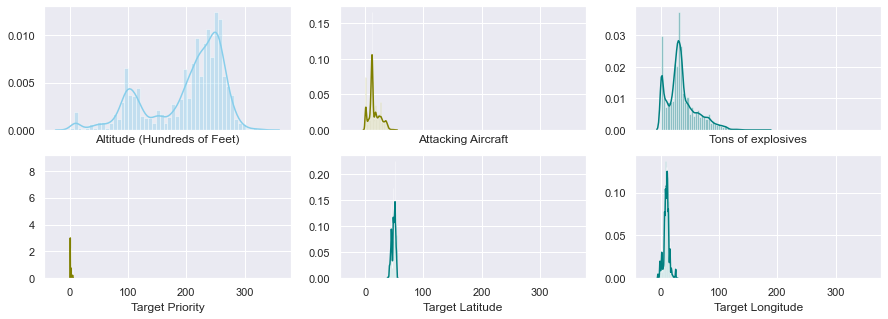

In [139]:
df = sns.load_dataset('iris')
# plot
f, axes = plt.subplots(2, 3, figsize=(15, 5), sharex=True)
sns.distplot(df_ml["Altitude (Hundreds of Feet)"] , color="skyblue", ax=axes[0,0])
sns.distplot(df_ml["Attacking Aircraft"] , color="olive", ax=axes[0,1])
sns.distplot(df_ml["Tons of explosives"] , color="teal", ax=axes[0,2])
sns.distplot(df_ml["Target Priority"] , color="olive", ax=axes[1,0])
sns.distplot(df_ml["Target Latitude"] , color="teal", ax=axes[1,1])
sns.distplot(df_ml["Target Longitude"] , color="teal", ax=axes[1,2])

In [140]:
df_ml['Mission Date']=df_ml['Mission Date'].map(dt.datetime.toordinal)

# Datavisualization

In [141]:
df_map['Target Country'].value_counts()

GERMANY                     24465
ITALY                        9963
FRANCE                       6765
AUSTRIA                      3024
CZECHOSLOVAKIA                663
ROMANIA                       632
YUGOSLAVIA                    592
HUNGARY                       578
BELGIUM                       376
HOLLAND OR NETHERLANDS        186
POLAND                        110
GREECE                         83
BULGARIA                       66
UNKNOWN OR NOT INDICATED       14
ALBANIA                        14
LUXEMBOURG                     11
DENMARK                        10
SWITZERLAND                     8
CORSICA                         4
SARDINIA                        2
TUNISIA                         2
TURKEY                          1
Name: Target Country, dtype: int64

In [142]:
germany=df_map[df_map['Target Country']=='GERMANY']
germany=germany[~((germany['Target Latitude']).abs()<47)]
germany=germany[~((germany['Target Longitude']).abs()<5)]
germany=germany[~((germany['Target Longitude']).abs()>17)]

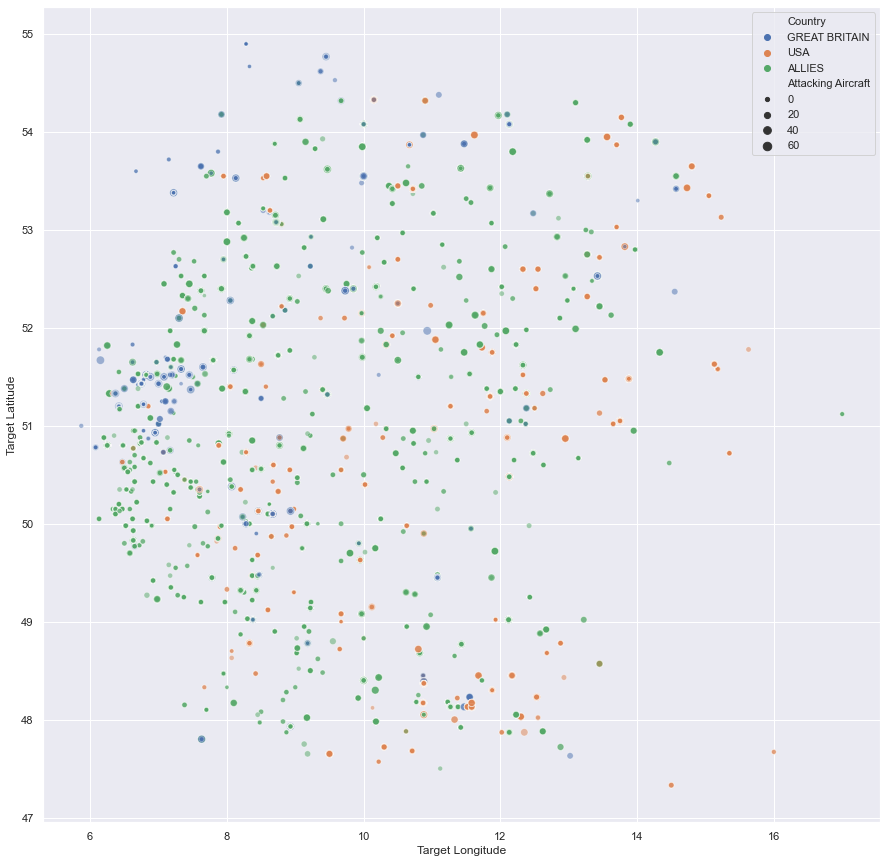

In [143]:
plt.figure(figsize=(15, 15))
sns.scatterplot(data=germany, 
                hue='Country', 
                size='Attacking Aircraft',
                alpha=.5,
                #palette="muted",
                x='Target Longitude',
                y='Target Latitude')
plt.savefig('germany.jpg', dpi=300)
plt.show()

In [144]:
france=df_map[df_map['Target Country']=='FRANCE']

In [145]:
france.describe().T

,count,mean,std,min,25%,50%,75%,max
Target Latitude,6765.0,47.801602,2.372461,42.52,45.63,48.7,49.43,53.52
Target Longitude,6765.0,2.254644,2.987609,-4.50,0.20,2.2,4.80,14.45
Altitude (Hundreds of Feet),6765.0,183.547524,53.338785,8.00,145.00,200.0,223.00,304.00
Attacking Aircraft,6765.0,16.781523,9.717879,0.00,11.00,13.0,23.00,52.00
Tons of explosives,6765.0,40.664006,26.431330,1.00,24.00,35.0,56.00,162.00


In [146]:
france=france[~((france['Target Latitude']).abs()>51)]
france=france[~((france['Target Latitude']).abs()<42)]
france=france[~((france['Target Longitude']).abs()>9)]

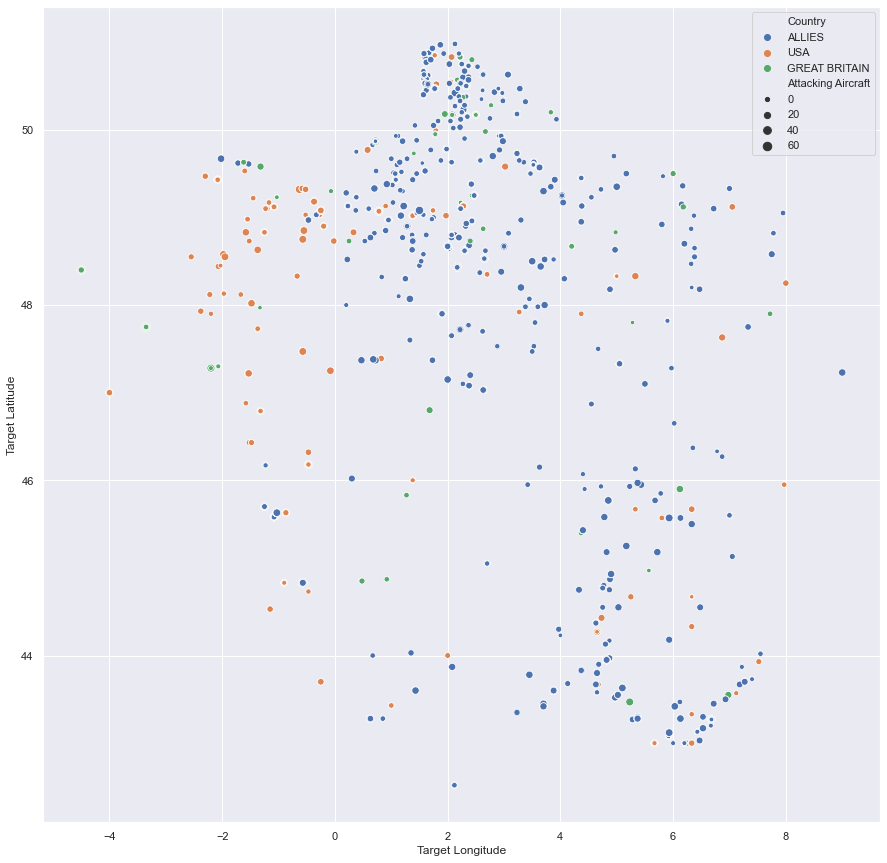

In [147]:
plt.figure(figsize=(15, 15))
sns.scatterplot(data=france, hue='Country', size='Attacking Aircraft' ,x='Target Longitude',y='Target Latitude')
plt.savefig('france.jpg', dpi=300)
plt.show()

In [148]:
italy=df_map[df_map['Target Country']=='ITALY']
italy=italy[~((italy['Target Latitude']).abs()<36)]
italy=italy[~((italy['Target Longitude']).abs()<3)]

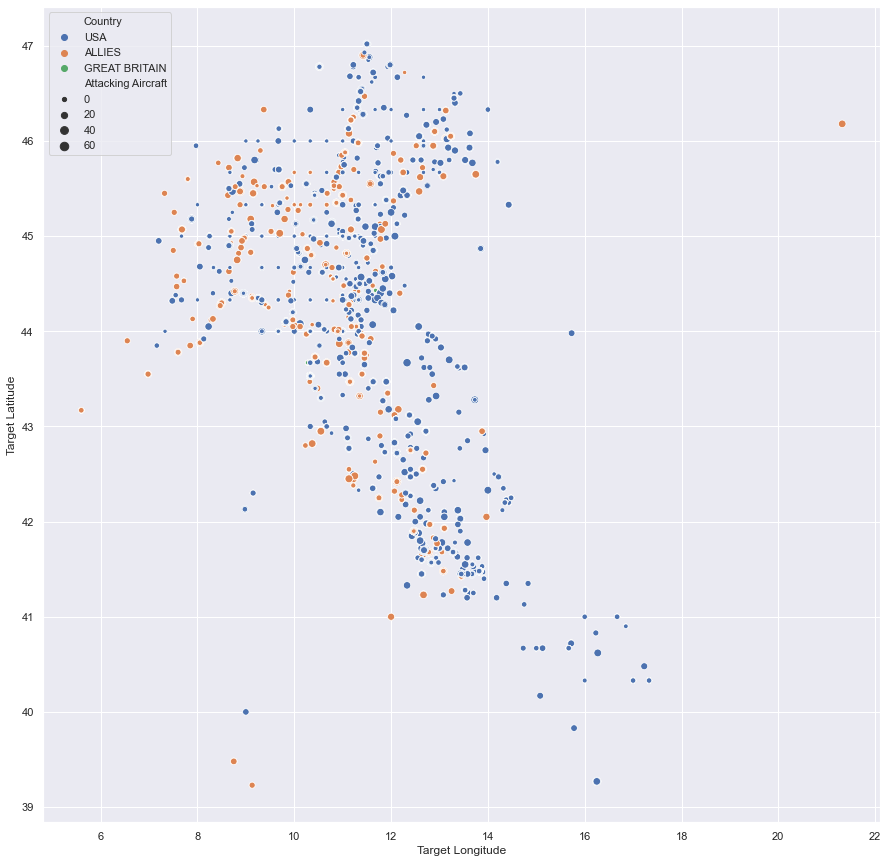

In [149]:
plt.figure(figsize=(15, 15))
sns.scatterplot(data=italy, hue='Country', size='Attacking Aircraft' ,x='Target Longitude',y='Target Latitude')
plt.savefig('italy.jpg', dpi=300)
plt.show()

# Charts and Maps

In [150]:
# Save in a csv if needed later 
df_map.to_csv("map_ww2.csv", index=False)

In [151]:
#plotly libs
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode , iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import plotly.express as px

In [152]:
data = df_map['Country'].value_counts()
data = [go.Bar(
            x=data.index,
            y=data.values,
            hoverinfo = 'text',
            marker = dict(color = ['LightSeaGreen', 'LightSalmon', 'LightSkyBlue'],
                             line=dict(color='rgb(0,0,0)',width=1.5)),
    )]

layout = dict(
    title = 'Bombers',
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [153]:
data = df_map['Target Country'].value_counts()
data = [go.Bar(
            x=data[:5].index,
            y=data[:5].values,
            hoverinfo = 'text',
            marker = dict(color = 'steelblue',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
    )]

layout = dict(
    title = 'Countries under bombs',
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [154]:
data = df_map['Target City'].value_counts()
data = [go.Bar(
            x=data[:20].index,
            y=data[:20].values,
            hoverinfo = 'text',
            marker = dict(color = 'steelblue',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
    )]

layout = dict(
    title = 'Cities under bombs',
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [155]:
data = df_map['Target Country'].value_counts()
data = [go.Bar(
            x=data[:20].index,
            y=data[:20].values,
            hoverinfo = 'text',
            marker = dict(color = 'coral',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
    )]

layout = dict(
    title = 'Countries under bombs',
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [156]:
data = df_map['Aircraft Series'].value_counts()
data = [go.Bar(
            x=data[:10].index,
            y=data[:10].values,
            hoverinfo = 'text',
            marker = dict(color = 'steelblue',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
    
    )]

layout = dict(
    title = 'Aircraft Series',
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [157]:
data = df_map['Aircraft Series'].value_counts()
data = [go.Bar(
            x=data[:10].index,
            y=data[:10].values,
            hoverinfo = 'text',
            marker = dict(color = 'steelblue',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
    
    )]

layout = dict(
    title = 'Aircraft Series',
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

# Create dummies for the modeling

In [158]:
df_ml=pd.get_dummies(data=df_ml, columns=['Country', 'Aircraft Series', 'Target Industry','Target Priority'])

In [159]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47571 entries, 0 to 49400
Data columns (total 45 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Mission Date                                47571 non-null  int64  
 1   Target City                                 47571 non-null  object 
 2   Target Latitude                             47571 non-null  float64
 3   Target Longitude                            47571 non-null  float64
 4   Altitude (Hundreds of Feet)                 47571 non-null  float64
 5   Attacking Aircraft                          47571 non-null  float64
 6   Tons of explosives                          47571 non-null  float64
 7   Country_ALLIES                              47571 non-null  uint8  
 8   Country_GREAT BRITAIN                       47571 non-null  uint8  
 9   Country_USA                                 47571 non-null  uint8  
 10  Aircraft S

In [160]:
df_ml.head()

,Mission Date,Target City,Target Latitude,Target Longitude,Altitude (Hundreds of Feet),Attacking Aircraft,Tons of explosives,Country_ALLIES,Country_GREAT BRITAIN,Country_USA,...,Target Industry_ROAD,Target Industry_TACTICAL TARGET,Target Industry_UNIDENTIFIED TARGETS,Target Industry_V - WEAPON LAUNCHING SITES,Target Industry_WAREHOUSE,Target Priority_1,Target Priority_2,Target Priority_3,Target Priority_4,Target Priority_5
0,709527,BERLIN,52.53,13.42,250.0,5.0,4.0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,709876,HILDESHEIM,52.15,9.97,265.0,17.0,42.0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,709876,HILDESHEIM,52.15,9.97,253.0,8.0,20.0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,709876,FRANKFURT AM MAIN,50.10,8.67,211.0,27.0,42.0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,709876,MERSEBURG,51.35,12.00,295.0,16.0,38.0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


# Modeling on the dataset

In [161]:
df_ml.columns

Index(['Mission Date', 'Target City', 'Target Latitude', 'Target Longitude',
       'Altitude (Hundreds of Feet)', 'Attacking Aircraft',
       'Tons of explosives', 'Country_ALLIES', 'Country_GREAT BRITAIN',
       'Country_USA', 'Aircraft Series_A20', 'Aircraft Series_A26',
       'Aircraft Series_B17', 'Aircraft Series_B24', 'Aircraft Series_B25',
       'Aircraft Series_B26', 'Aircraft Series_BLEN', 'Aircraft Series_GB17',
       'Aircraft Series_HAMP', 'Aircraft Series_HVY', 'Aircraft Series_LGT',
       'Aircraft Series_OTHER', 'Aircraft Series_WELL', 'Aircraft Series_WHIT',
       'Target Industry_AIRFIELD', 'Target Industry_BRIDGES',
       'Target Industry_CHEMICAL PLANTS', 'Target Industry_CITY',
       'Target Industry_FACTORY', 'Target Industry_GUN EMPLACEMENT',
       'Target Industry_NATURAL OIL REFINERIES',
       'Target Industry_OIL REFINERY', 'Target Industry_OTHER',
       'Target Industry_PORT', 'Target Industry_RAILROAD',
       'Target Industry_ROAD', 'Target Indu

In [162]:
df_ml.describe().T

,count,mean,std,min,25%,50%,75%,max
Mission Date,47571.0,709921.391751,218.267475,708425.00,709845.0,709941.00,710075.00,710153.00
Target Latitude,47571.0,48.756901,3.289198,38.83,45.8,49.36,51.35,55.48
Target Longitude,47571.0,10.017380,4.726289,-4.50,7.7,10.25,12.38,28.67
Altitude (Hundreds of Feet),47571.0,199.786971,65.953184,0.00,155.0,221.00,250.00,335.00
Attacking Aircraft,47571.0,15.992558,9.936222,0.00,11.0,12.00,23.00,52.00
Tons of explosives,47571.0,36.281516,25.563947,1.00,21.0,32.00,48.00,182.00
Country_ALLIES,47571.0,0.520590,0.499581,0.00,0.0,1.00,1.00,1.00
Country_GREAT BRITAIN,47571.0,0.056316,0.230533,0.00,0.0,0.00,0.00,1.00
Country_USA,47571.0,0.423094,0.494055,0.00,0.0,0.00,1.00,1.00
Aircraft Series_A20,47571.0,0.054991,0.227966,0.00,0.0,0.00,0.00,1.00


# Focus on Attacking Countries

In [163]:
df_ml_uk=df_ml[['Mission Date', 'Altitude (Hundreds of Feet)',
       'Attacking Aircraft', 'Tons of explosives', 'Country_GREAT BRITAIN']]

In [164]:
df_ml_uk.dtypes

Mission Date                     int64
Altitude (Hundreds of Feet)    float64
Attacking Aircraft             float64
Tons of explosives             float64
Country_GREAT BRITAIN            uint8
dtype: object

# Feature selection

In [165]:
from sklearn.feature_selection import SelectKBest, f_regression
from statsmodels.api import OLS, add_constant

## For the USA modeling

In [166]:
df_ml.columns

Index(['Mission Date', 'Target City', 'Target Latitude', 'Target Longitude',
       'Altitude (Hundreds of Feet)', 'Attacking Aircraft',
       'Tons of explosives', 'Country_ALLIES', 'Country_GREAT BRITAIN',
       'Country_USA', 'Aircraft Series_A20', 'Aircraft Series_A26',
       'Aircraft Series_B17', 'Aircraft Series_B24', 'Aircraft Series_B25',
       'Aircraft Series_B26', 'Aircraft Series_BLEN', 'Aircraft Series_GB17',
       'Aircraft Series_HAMP', 'Aircraft Series_HVY', 'Aircraft Series_LGT',
       'Aircraft Series_OTHER', 'Aircraft Series_WELL', 'Aircraft Series_WHIT',
       'Target Industry_AIRFIELD', 'Target Industry_BRIDGES',
       'Target Industry_CHEMICAL PLANTS', 'Target Industry_CITY',
       'Target Industry_FACTORY', 'Target Industry_GUN EMPLACEMENT',
       'Target Industry_NATURAL OIL REFINERIES',
       'Target Industry_OIL REFINERY', 'Target Industry_OTHER',
       'Target Industry_PORT', 'Target Industry_RAILROAD',
       'Target Industry_ROAD', 'Target Indu

In [223]:
df_ml_us=df_ml[['Mission Date', 'Target Latitude', 'Target Longitude', 'Altitude (Hundreds of Feet)',
       'Attacking Aircraft', 'Tons of explosives', 'Country_USA']].copy()

In [224]:
df_ml_us.dtypes

Mission Date                     int64
Target Latitude                float64
Target Longitude               float64
Altitude (Hundreds of Feet)    float64
Attacking Aircraft             float64
Tons of explosives             float64
Country_USA                      uint8
dtype: object

In [225]:
df_ml_us.describe().T

,count,mean,std,min,25%,50%,75%,max
Mission Date,47571.0,709921.391751,218.267475,708425.00,709845.0,709941.00,710075.00,710153.00
Target Latitude,47571.0,48.756901,3.289198,38.83,45.8,49.36,51.35,55.48
Target Longitude,47571.0,10.017380,4.726289,-4.50,7.7,10.25,12.38,28.67
Altitude (Hundreds of Feet),47571.0,199.786971,65.953184,0.00,155.0,221.00,250.00,335.00
Attacking Aircraft,47571.0,15.992558,9.936222,0.00,11.0,12.00,23.00,52.00
Tons of explosives,47571.0,36.281516,25.563947,1.00,21.0,32.00,48.00,182.00
Country_USA,47571.0,0.423094,0.494055,0.00,0.0,0.00,1.00,1.00


### Normalize columns

In [226]:
# Import standardcaler
from sklearn.preprocessing import StandardScaler

In [227]:
scaler=StandardScaler()

In [228]:
df_ml_us.iloc[:, :6]=scaler.fit_transform(df_ml_us.iloc[:, :6])

<AxesSubplot:xlabel='Tons of explosives'>

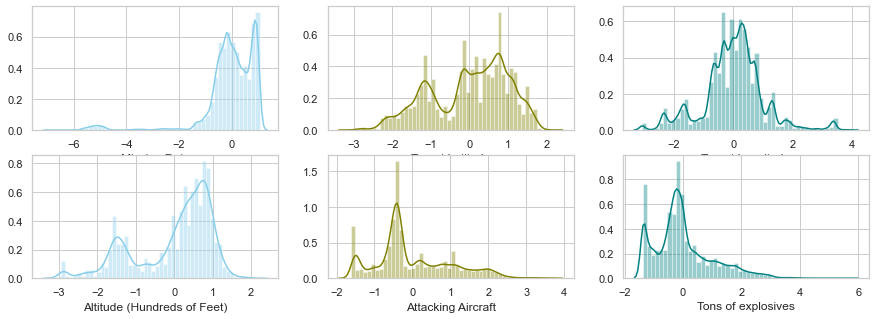

In [229]:
# plot
f, axes = plt.subplots(2, 3, figsize=(15, 5))
sns.distplot(df_ml_us["Mission Date"] , color="skyblue", ax=axes[0,0])
sns.distplot(df_ml_us["Target Latitude"] , color="olive", ax=axes[0,1])
sns.distplot(df_ml_us["Target Longitude"] , color="teal", ax=axes[0,2])
sns.distplot(df_ml_us["Altitude (Hundreds of Feet)"] , color="skyblue", ax=axes[1,0])
sns.distplot(df_ml_us["Attacking Aircraft"] , color="olive", ax=axes[1,1])
sns.distplot(df_ml_us["Tons of explosives"] , color="teal", ax=axes[1,2])

### Change the distribution with BoxCox

In [232]:
# Delete every non-positive values
df_ml_us=df_ml_us[df_ml_us["Altitude (Hundreds of Feet)"]>0]
df_ml_us=df_ml_us[df_ml_us["Attacking Aircraft"]>0]
df_ml_us=df_ml_us[df_ml_us["Tons of explosives"]>0]

In [233]:
from scipy.stats import boxcox

In [234]:
df_ml_us["Altitude (Hundreds of Feet)"]=boxcox(df_ml_us["Altitude (Hundreds of Feet)"])[0]
df_ml_us["Attacking Aircraft"]=boxcox(df_ml_us["Attacking Aircraft"])[0]
df_ml_us["Tons of explosives"]=boxcox(df_ml_us["Tons of explosives"])[0]

<AxesSubplot:xlabel='Tons of explosives'>

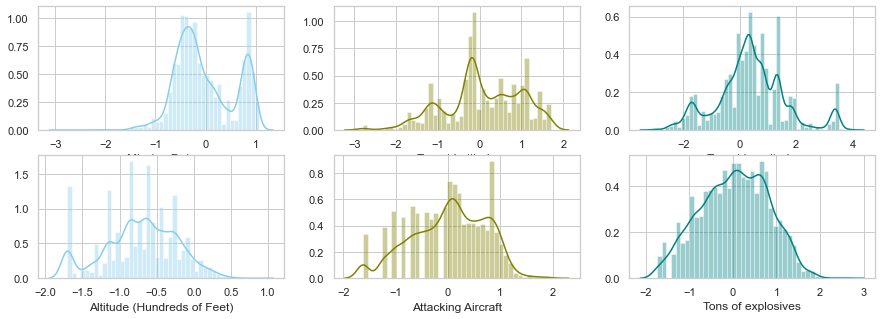

In [235]:
df = sns.load_dataset('iris')
# plot
f, axes = plt.subplots(2, 3, figsize=(15, 5))
sns.distplot(df_ml_us["Mission Date"] , color="skyblue", ax=axes[0,0])
sns.distplot(df_ml_us["Target Latitude"] , color="olive", ax=axes[0,1])
sns.distplot(df_ml_us["Target Longitude"] , color="teal", ax=axes[0,2])
sns.distplot(df_ml_us["Altitude (Hundreds of Feet)"] , color="skyblue", ax=axes[1,0])
sns.distplot(df_ml_us["Attacking Aircraft"] , color="olive", ax=axes[1,1])
sns.distplot(df_ml_us["Tons of explosives"] , color="teal", ax=axes[1,2])

### Create the predict and the predictor

In [236]:
X_us,y_us = df_ml_us.drop(['Country_USA'], axis=1), df_ml_us.Country_USA

## PCA

In [237]:
from sklearn.decomposition import PCA

In [238]:
pca=PCA(0.95)

In [239]:
pca.fit(X_us)

PCA(n_components=0.95)

In [240]:
pca.transform(X_us)

array([[-0.75786403, -1.81455999, -0.54951043,  0.19453698, -0.46163624],
       [-0.70108036, -0.72090028,  0.16020501,  0.14957947,  0.50674331],
       [-0.28468367, -2.45473866, -0.47161746,  0.04383614, -0.80297415],
       ...,
       [ 3.26092261,  0.58336713,  0.07350425,  0.25285096, -0.03366836],
       [ 3.24902367,  0.08144569,  0.15798031,  0.25278874,  0.06759809],
       [ 3.24902367,  0.08144569,  0.15798031,  0.25278874,  0.06759809]])

<AxesSubplot:>

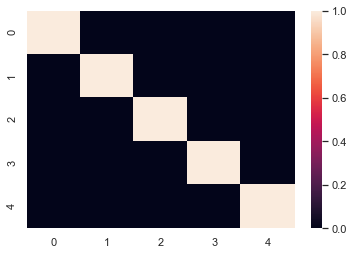

In [241]:
sns.heatmap(pd.DataFrame(pca.transform(X_us)).corr().round())

In [242]:
pca.explained_variance_ratio_.sum()

0.9612978459072509

### Modify X_us with PCA

In [243]:
X_us_new=pca.transform(X_us)

## Models

In [244]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

### Train Test split

In [245]:
X_train, X_test, y_train, y_test = train_test_split(X_us_new,y_us, test_size=0.25, random_state=42)

### Logistic Regression

In [246]:
model1 = LogisticRegression(max_iter=1e8, class_weight='balanced')
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
display(confusion_matrix(y_test, y_pred1))
print('The accuracy score is:',accuracy_score(y_test, y_pred1))
print('The precision score is:',precision_score(y_test, y_pred1))
print('The recall score is:',recall_score(y_test, y_pred1))
print('The f1 score is:',f1_score(y_test, y_pred1))

array([[1082,  277],
       [ 275, 1001]], dtype=int64)

The accuracy score is: 0.7905123339658444
The precision score is: 0.7832550860719875
The recall score is: 0.7844827586206896
The f1 score is: 0.7838684416601409


### KNN

In [247]:
best_model=None
best_accuracy=0
loa=[]
for i in range(3,13):
    current_model=KNeighborsClassifier(i)
    current_model.fit(X_train, y_train)
    current_pred=current_model.predict(X_test)
    current_accuracy=accuracy_score(y_test, current_pred)
    loa.append(current_accuracy)
    if current_accuracy>best_accuracy:
        best_accuracy=current_accuracy
        best_model=current_model
        print(i)

3


In [248]:
model2 = KNeighborsClassifier(3)
model2.fit(X_train, y_train)
y_pred2 = model1.predict(X_test)
display(confusion_matrix(y_test, y_pred2))
print('The accuracy score is:',accuracy_score(y_test, y_pred2))
print('The precision score is:',precision_score(y_test, y_pred2))
print('The recall score is:',recall_score(y_test, y_pred2))
print('The f1 score is:',f1_score(y_test, y_pred2))

array([[1082,  277],
       [ 275, 1001]], dtype=int64)

The accuracy score is: 0.7905123339658444
The precision score is: 0.7832550860719875
The recall score is: 0.7844827586206896
The f1 score is: 0.7838684416601409


### SVM

In [249]:
model3 = SVC()
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
display(confusion_matrix(y_test, y_pred3))
print('The accuracy score is:',accuracy_score(y_test, y_pred3))
print('The precision score is:',precision_score(y_test, y_pred3))
print('The recall score is:',recall_score(y_test, y_pred3))
print('The f1 score is:',f1_score(y_test, y_pred3))

array([[1121,  238],
       [ 238, 1038]], dtype=int64)

The accuracy score is: 0.8193548387096774
The precision score is: 0.8134796238244514
The recall score is: 0.8134796238244514
The f1 score is: 0.8134796238244514


### GaussianNB

In [250]:
model4 = GaussianNB()
model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_test)
display(confusion_matrix(y_test, y_pred4))
print('The accuracy score is:',accuracy_score(y_test, y_pred4))
print('The precision score is:',precision_score(y_test, y_pred4))
print('The recall score is:',recall_score(y_test, y_pred4))
print('The f1 score is:',f1_score(y_test, y_pred4))

array([[1161,  198],
       [ 341,  935]], dtype=int64)

The accuracy score is: 0.7954459203036053
The precision score is: 0.8252427184466019
The recall score is: 0.7327586206896551
The f1 score is: 0.776255707762557


### Decision Tree

In [251]:
model5 = DecisionTreeClassifier()
model5.fit(X_train, y_train)
y_pred5 = model5.predict(X_test)
display(confusion_matrix(y_test, y_pred5))
print('The accuracy score is:',accuracy_score(y_test, y_pred5))
print('The precision score is:',precision_score(y_test, y_pred5))
print('The recall score is:',recall_score(y_test, y_pred5))
print('The f1 score is:',f1_score(y_test, y_pred5))

array([[1313,   46],
       [  61, 1215]], dtype=int64)

The accuracy score is: 0.959392789373814
The precision score is: 0.9635210150674068
The recall score is: 0.9521943573667712
The f1 score is: 0.9578242018131652


### RandomForestClassifier

In [252]:
model6=RandomForestClassifier()
model6.fit(X_train, y_train)
y_pred6 = model6.predict(X_test)
display(confusion_matrix(y_test, y_pred6))
print('The accuracy score is:',accuracy_score(y_test, y_pred6))
print('The precision score is:',precision_score(y_test, y_pred6))
print('The recall score is:',recall_score(y_test, y_pred6))
print('The f1 score is:',f1_score(y_test, y_pred6))

array([[1318,   41],
       [  53, 1223]], dtype=int64)

The accuracy score is: 0.964326375711575
The precision score is: 0.9675632911392406
The recall score is: 0.9584639498432602
The f1 score is: 0.962992125984252


### AdaBoost

In [253]:
model7 = AdaBoostClassifier()
model7.fit(X_train, y_train)
y_pred7 = model7.predict(X_test)
display(confusion_matrix(y_test, y_pred7))
print('The accuracy score is:',accuracy_score(y_test, y_pred7))
print('The precision score is:',precision_score(y_test, y_pred7))
print('The recall score is:',recall_score(y_test, y_pred7))
print('The f1 score is:',f1_score(y_test, y_pred7))

array([[1080,  279],
       [ 272, 1004]], dtype=int64)

The accuracy score is: 0.7908918406072106
The precision score is: 0.7825409197194076
The recall score is: 0.786833855799373
The f1 score is: 0.7846815162172724


### XGBoost

In [254]:
model8 = XGBClassifier()
model8.fit(X_train, y_train)
y_pred8 = model8.predict(X_test)
display(confusion_matrix(y_test, y_pred8))
print('The accuracy score is:',accuracy_score(y_test, y_pred8))
print('The precision score is:',precision_score(y_test, y_pred8))
print('The recall score is:',recall_score(y_test, y_pred8))
print('The f1 score is:',f1_score(y_test, y_pred8))

array([[1296,   63],
       [  72, 1204]], dtype=int64)

The accuracy score is: 0.9487666034155597
The precision score is: 0.9502762430939227
The recall score is: 0.9435736677115988
The f1 score is: 0.9469130947699568


### LightGBM

In [255]:
model9 = LGBMClassifier()
model9.fit(X_train, y_train)
y_pred9 = model9.predict(X_test)
display(confusion_matrix(y_test, y_pred9))
print('The accuracy score is:',accuracy_score(y_test, y_pred9))
print('The precision score is:',precision_score(y_test, y_pred9))
print('The recall score is:',recall_score(y_test, y_pred9))
print('The f1 score is:',f1_score(y_test, y_pred9))

array([[1271,   88],
       [  97, 1179]], dtype=int64)

The accuracy score is: 0.9297912713472486
The precision score is: 0.930544593528019
The recall score is: 0.9239811912225705
The f1 score is: 0.9272512780180888


### CatBoost

In [256]:
model10=CatBoostClassifier()
model10.fit(X_train, y_train)
y_pred10 = model10.predict(X_test)
display(confusion_matrix(y_test, y_pred10))
print(accuracy_score(y_test, y_pred10))
print(precision_score(y_test, y_pred10))
print(recall_score(y_test, y_pred10))
print(f1_score(y_test, y_pred10))

Learning rate set to 0.024905
0:	learn: 0.6804015	total: 10.1ms	remaining: 10.1s
1:	learn: 0.6668299	total: 20ms	remaining: 9.98s
2:	learn: 0.6541388	total: 31.9ms	remaining: 10.6s
3:	learn: 0.6429811	total: 40.3ms	remaining: 10s
4:	learn: 0.6293822	total: 49.6ms	remaining: 9.87s
5:	learn: 0.6186990	total: 58.3ms	remaining: 9.66s
6:	learn: 0.6073540	total: 81.4ms	remaining: 11.6s
7:	learn: 0.5981356	total: 89.9ms	remaining: 11.2s
8:	learn: 0.5901995	total: 99ms	remaining: 10.9s
9:	learn: 0.5825982	total: 119ms	remaining: 11.8s
10:	learn: 0.5745077	total: 130ms	remaining: 11.7s
11:	learn: 0.5671529	total: 139ms	remaining: 11.4s
12:	learn: 0.5589610	total: 147ms	remaining: 11.2s
13:	learn: 0.5511884	total: 160ms	remaining: 11.2s
14:	learn: 0.5445811	total: 169ms	remaining: 11.1s
15:	learn: 0.5377007	total: 179ms	remaining: 11s
16:	learn: 0.5324690	total: 189ms	remaining: 10.9s
17:	learn: 0.5259943	total: 197ms	remaining: 10.7s
18:	learn: 0.5196610	total: 206ms	remaining: 10.6s
19:	learn:

171:	learn: 0.3285352	total: 2.28s	remaining: 11s
172:	learn: 0.3282780	total: 2.29s	remaining: 11s
173:	learn: 0.3280524	total: 2.31s	remaining: 11s
174:	learn: 0.3275861	total: 2.32s	remaining: 11s
175:	learn: 0.3272931	total: 2.35s	remaining: 11s
176:	learn: 0.3270215	total: 2.37s	remaining: 11s
177:	learn: 0.3266209	total: 2.39s	remaining: 11s
178:	learn: 0.3262189	total: 2.4s	remaining: 11s
179:	learn: 0.3260018	total: 2.41s	remaining: 11s
180:	learn: 0.3256185	total: 2.42s	remaining: 10.9s
181:	learn: 0.3253139	total: 2.42s	remaining: 10.9s
182:	learn: 0.3249107	total: 2.43s	remaining: 10.9s
183:	learn: 0.3244551	total: 2.44s	remaining: 10.8s
184:	learn: 0.3240727	total: 2.46s	remaining: 10.8s
185:	learn: 0.3233949	total: 2.46s	remaining: 10.8s
186:	learn: 0.3226932	total: 2.47s	remaining: 10.7s
187:	learn: 0.3223953	total: 2.48s	remaining: 10.7s
188:	learn: 0.3220711	total: 2.49s	remaining: 10.7s
189:	learn: 0.3215513	total: 2.5s	remaining: 10.7s
190:	learn: 0.3210144	total: 2.5

337:	learn: 0.2792031	total: 4.05s	remaining: 7.94s
338:	learn: 0.2790114	total: 4.07s	remaining: 7.94s
339:	learn: 0.2787332	total: 4.08s	remaining: 7.92s
340:	learn: 0.2782396	total: 4.11s	remaining: 7.93s
341:	learn: 0.2778241	total: 4.13s	remaining: 7.94s
342:	learn: 0.2776058	total: 4.13s	remaining: 7.92s
343:	learn: 0.2772054	total: 4.15s	remaining: 7.91s
344:	learn: 0.2767790	total: 4.16s	remaining: 7.89s
345:	learn: 0.2765343	total: 4.17s	remaining: 7.88s
346:	learn: 0.2761398	total: 4.17s	remaining: 7.86s
347:	learn: 0.2759901	total: 4.2s	remaining: 7.87s
348:	learn: 0.2756566	total: 4.23s	remaining: 7.88s
349:	learn: 0.2754913	total: 4.25s	remaining: 7.88s
350:	learn: 0.2751590	total: 4.25s	remaining: 7.86s
351:	learn: 0.2748913	total: 4.27s	remaining: 7.85s
352:	learn: 0.2746739	total: 4.28s	remaining: 7.84s
353:	learn: 0.2744468	total: 4.29s	remaining: 7.82s
354:	learn: 0.2743259	total: 4.29s	remaining: 7.8s
355:	learn: 0.2740048	total: 4.3s	remaining: 7.79s
356:	learn: 0.2

503:	learn: 0.2370308	total: 5.92s	remaining: 5.82s
504:	learn: 0.2368351	total: 5.93s	remaining: 5.81s
505:	learn: 0.2365693	total: 5.93s	remaining: 5.79s
506:	learn: 0.2363773	total: 5.95s	remaining: 5.79s
507:	learn: 0.2361154	total: 5.96s	remaining: 5.77s
508:	learn: 0.2359406	total: 5.97s	remaining: 5.76s
509:	learn: 0.2355945	total: 5.98s	remaining: 5.74s
510:	learn: 0.2353501	total: 5.98s	remaining: 5.73s
511:	learn: 0.2351976	total: 5.99s	remaining: 5.71s
512:	learn: 0.2348728	total: 6s	remaining: 5.7s
513:	learn: 0.2345684	total: 6.01s	remaining: 5.68s
514:	learn: 0.2342733	total: 6.02s	remaining: 5.67s
515:	learn: 0.2341315	total: 6.03s	remaining: 5.65s
516:	learn: 0.2338877	total: 6.04s	remaining: 5.64s
517:	learn: 0.2336075	total: 6.05s	remaining: 5.63s
518:	learn: 0.2334942	total: 6.06s	remaining: 5.62s
519:	learn: 0.2332576	total: 6.07s	remaining: 5.6s
520:	learn: 0.2330889	total: 6.08s	remaining: 5.59s
521:	learn: 0.2328749	total: 6.09s	remaining: 5.57s
522:	learn: 0.232

666:	learn: 0.2055957	total: 8.05s	remaining: 4.02s
667:	learn: 0.2054874	total: 8.06s	remaining: 4s
668:	learn: 0.2052335	total: 8.06s	remaining: 3.99s
669:	learn: 0.2051302	total: 8.08s	remaining: 3.98s
670:	learn: 0.2050484	total: 8.09s	remaining: 3.96s
671:	learn: 0.2049655	total: 8.09s	remaining: 3.95s
672:	learn: 0.2047974	total: 8.11s	remaining: 3.94s
673:	learn: 0.2046262	total: 8.12s	remaining: 3.93s
674:	learn: 0.2044130	total: 8.13s	remaining: 3.91s
675:	learn: 0.2041488	total: 8.13s	remaining: 3.9s
676:	learn: 0.2038610	total: 8.15s	remaining: 3.89s
677:	learn: 0.2037064	total: 8.15s	remaining: 3.87s
678:	learn: 0.2035171	total: 8.17s	remaining: 3.86s
679:	learn: 0.2032287	total: 8.19s	remaining: 3.85s
680:	learn: 0.2030362	total: 8.2s	remaining: 3.84s
681:	learn: 0.2028650	total: 8.22s	remaining: 3.83s
682:	learn: 0.2025401	total: 8.24s	remaining: 3.82s
683:	learn: 0.2024041	total: 8.25s	remaining: 3.81s
684:	learn: 0.2021505	total: 8.26s	remaining: 3.8s
685:	learn: 0.2019

825:	learn: 0.1818591	total: 10.2s	remaining: 2.15s
826:	learn: 0.1817473	total: 10.2s	remaining: 2.13s
827:	learn: 0.1815734	total: 10.2s	remaining: 2.12s
828:	learn: 0.1814102	total: 10.3s	remaining: 2.11s
829:	learn: 0.1813405	total: 10.3s	remaining: 2.1s
830:	learn: 0.1812661	total: 10.3s	remaining: 2.09s
831:	learn: 0.1811132	total: 10.3s	remaining: 2.08s
832:	learn: 0.1810318	total: 10.3s	remaining: 2.07s
833:	learn: 0.1808853	total: 10.3s	remaining: 2.05s
834:	learn: 0.1807151	total: 10.3s	remaining: 2.04s
835:	learn: 0.1805707	total: 10.3s	remaining: 2.03s
836:	learn: 0.1804368	total: 10.4s	remaining: 2.02s
837:	learn: 0.1803389	total: 10.4s	remaining: 2s
838:	learn: 0.1802354	total: 10.4s	remaining: 1.99s
839:	learn: 0.1801298	total: 10.4s	remaining: 1.98s
840:	learn: 0.1800337	total: 10.4s	remaining: 1.97s
841:	learn: 0.1798897	total: 10.4s	remaining: 1.96s
842:	learn: 0.1797694	total: 10.4s	remaining: 1.94s
843:	learn: 0.1796753	total: 10.4s	remaining: 1.93s
844:	learn: 0.17

array([[1264,   95],
       [ 122, 1154]], dtype=int64)

0.9176470588235294
0.9239391513210569
0.9043887147335423
0.9140594059405941


In [257]:
a,p,r,f=[],[],[],[]
for model in [model1, model2, model3, model4, model5, model6, model7, model8, model9, model10]:
    a.append(accuracy_score(y_test, model.predict(X_test)))
    p.append(precision_score(y_test, model.predict(X_test)))
    r.append(recall_score(y_test, model.predict(X_test)))
    f.append(f1_score(y_test, model.predict(X_test)))

In [258]:
model_score=pd.DataFrame([a,p,r,f], columns=['LR','KNN','SVC','NB','DT','RF','Ada','XGB','LGBM', 'CAT']).T.sort_values(by=2, ascending=False).rename(columns={0: 'Accuracy Score', 1:'Precision Score', 2:'Recall Score', 3:'F1 Score'})
model_score

,Accuracy Score,Precision Score,Recall Score,F1 Score
RF,0.964326,0.967563,0.958464,0.962992
DT,0.959393,0.963521,0.952194,0.957824
XGB,0.948767,0.950276,0.943574,0.946913
LGBM,0.929791,0.930545,0.923981,0.927251
KNN,0.908159,0.902648,0.908307,0.905469
CAT,0.917647,0.923939,0.904389,0.914059
SVC,0.819355,0.813480,0.813480,0.813480
Ada,0.790892,0.782541,0.786834,0.784682
LR,0.790512,0.783255,0.784483,0.783868
NB,0.795446,0.825243,0.732759,0.776256


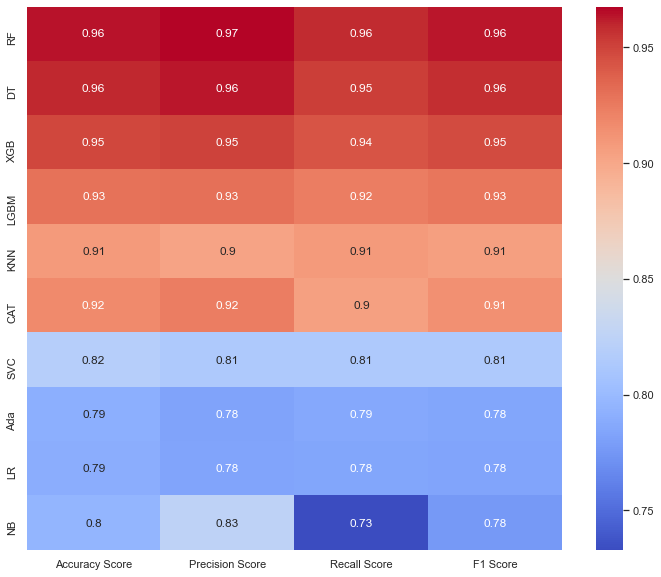

In [259]:
plt.figure(figsize=(12, 10))
sns.heatmap(model_score, 
            annot=True, 
            cmap= 'coolwarm')
plt.savefig('Model Score.jpg')
plt.show()

<AxesSubplot:>

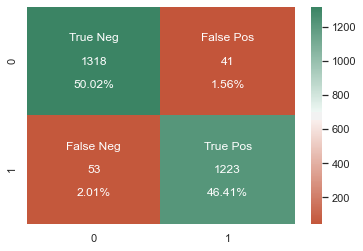

In [264]:
cf_matrix=confusion_matrix(y_test, y_pred6)
plt.figure(figsize=(6,4))

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{value_1}\n\n{value_2}\n\n{value_3}" for value_1, value_2, value_3 
          in zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

sns.set(font_scale=1) 
cmap = sns.diverging_palette(20, 150, as_cmap=True)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap=cmap)

<AxesSubplot:>

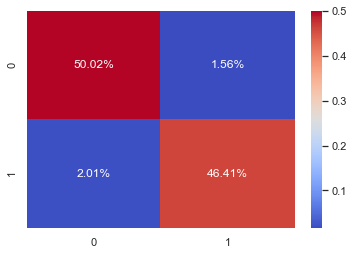

In [261]:
sns.heatmap(confusion_matrix(y_test, y_pred6)/np.sum(confusion_matrix(y_test, y_pred6)),
           annot=True,
           fmt='.2%',
           cmap='coolwarm',
            #xticklabels='predicted',
            #yticklabels='actual',
           )

**Conclusions**
* The best model seems to be RandomForest, based on the recall score, followed by Decision Tree and XGBoost.
* Same for the confusion matrix, the number of False Negative and False Positive are the lower in RandomForest.
* To check if there is no problem of overfitting, let's test with the X_test

In [265]:
model6=RandomForestClassifier()
model6.fit(X_train, y_train)
y_pred6 = model6.predict(X_test)
display(confusion_matrix(y_test, y_pred6))
print('The accuracy score is:',accuracy_score(y_test, y_pred6))
print('The precision score is:',precision_score(y_test, y_pred6))
print('The recall score is:',recall_score(y_test, y_pred6))
print('The f1 score is:',f1_score(y_test, y_pred6))

array([[1318,   41],
       [  48, 1228]], dtype=int64)

The accuracy score is: 0.966223908918406
The precision score is: 0.9676910953506698
The recall score is: 0.9623824451410659
The f1 score is: 0.9650294695481336


In [266]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
# Check model performance on training data
predictions = model.predict(X_train)
print(accuracy_score(y_train, predictions))

1.0


In [267]:
recall_score(y_test, y_pred6)

0.9623824451410659

In [268]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred6)

0.966106601525647

In [269]:
accuracy_score(y_test, y_pred6)

0.966223908918406

In [270]:
from sklearn.metrics import log_loss
log_loss(y_test, y_pred6)

1.1665972989152527

In [271]:
X_us['prediction']=model6.predict(X_us_new)

In [272]:
X_us

,Mission Date,Target Latitude,Target Longitude,Altitude (Hundreds of Feet),Attacking Aircraft,Tons of explosives,prediction
1,-0.207966,1.031599,-0.010025,-0.011240,-1.234988,-1.077820,0
3,-0.207966,0.408341,-0.285085,-1.120350,0.105653,-1.077820,0
4,-0.207966,0.788376,0.419492,0.407968,-1.622374,-1.535718,0
5,-0.207966,0.788376,0.419492,0.407968,-1.622374,-1.535718,0
6,0.717514,-0.449020,0.313700,-0.252730,-0.314588,-0.917672,1
...,...,...,...,...,...,...,...
49391,-0.212548,-1.163488,3.392258,-0.789161,-1.234988,-1.169292,1
49392,-0.212548,-1.163488,3.392258,-0.863034,0.468737,0.489170,1
49393,-0.212548,-1.163488,3.392258,-0.863034,0.468737,0.489170,1
49394,-0.212548,-1.163488,3.392258,-0.914970,0.105653,0.119583,1


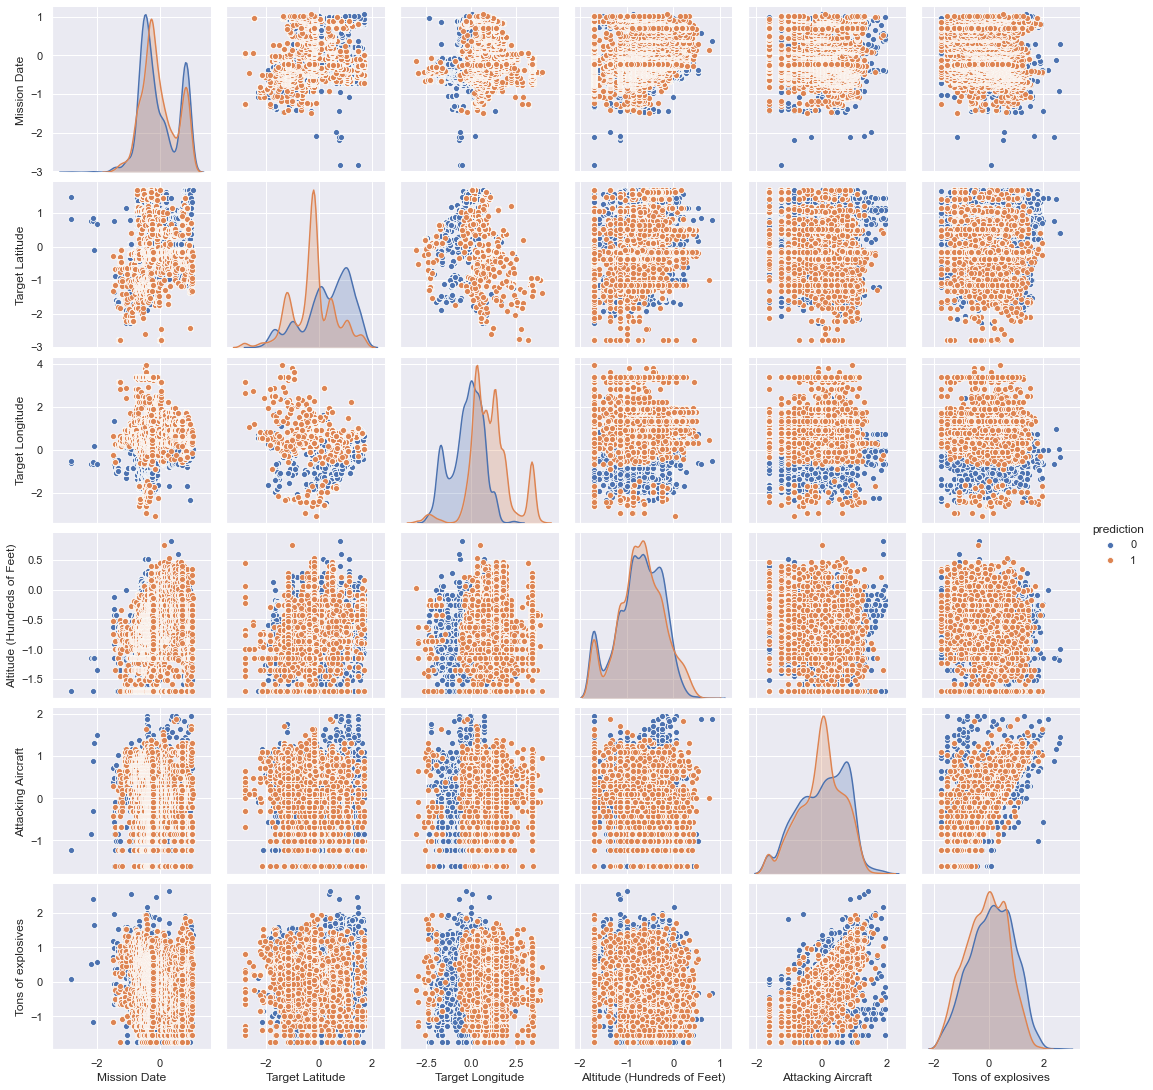

In [273]:
sns.pairplot(X_us, hue='prediction')

In [274]:
model6.feature_importances_

array([0.53912941, 0.09287915, 0.15694124, 0.12374594, 0.08730427])

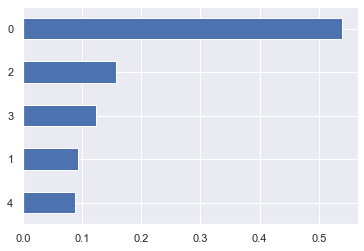

In [275]:
pd.Series(model6.feature_importances_, index=pd.DataFrame(X_train).columns).sort_values().plot.barh()
plt.savefig('feature_importance.jpg', dpi=300)
plt.show()

In [214]:
model6.feature_importances_

array([0.53597842, 0.0946071 , 0.15702322, 0.12244138, 0.08994988])

In [215]:
model6.n_features_ 

5

In [216]:
model6.n_estimators

100

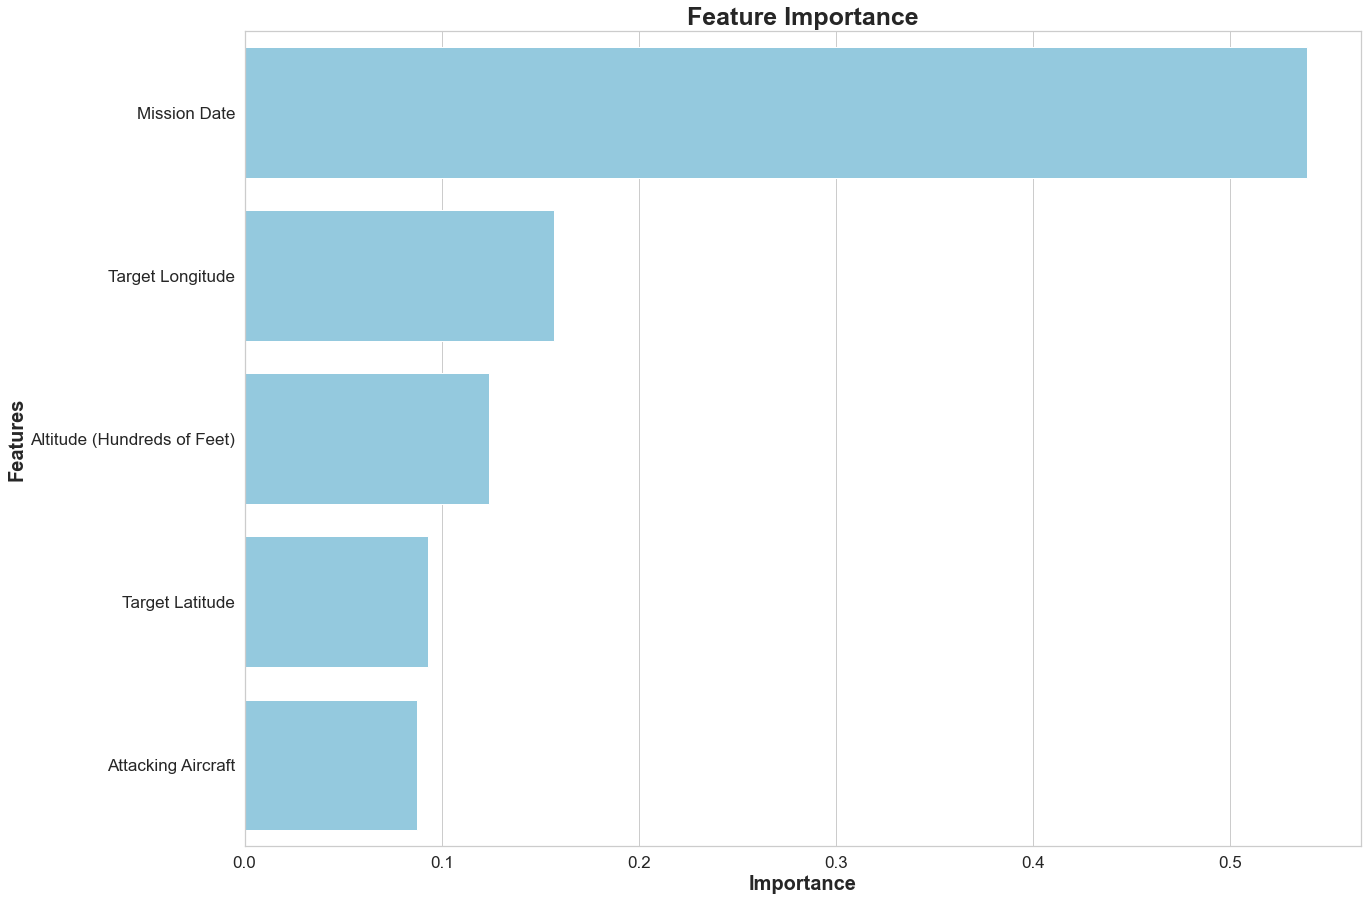

None

,Features,Gini-Importance
0,Mission Date,0.539129
1,Target Longitude,0.156941
2,Altitude (Hundreds of Feet),0.123746
3,Target Latitude,0.092879
4,Attacking Aircraft,0.087304


In [276]:
feats = {}
for feature, importance in zip(df_ml_us.columns, model6.feature_importances_):
    feats[feature] = importance
    importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})

sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True)
fig, ax = plt.subplots()
fig.set_size_inches(20,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=20, weight = 'bold')
plt.ylabel('Features', fontsize=20, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
display(plt.show())
display(importances)

In [218]:
from pycaret.classification import *

In [277]:
df_ml_us

,Mission Date,Target Latitude,Target Longitude,Altitude (Hundreds of Feet),Attacking Aircraft,Tons of explosives,Country_USA
1,-0.207966,1.031599,-0.010025,-0.011240,-1.234988,-1.077820,1
3,-0.207966,0.408341,-0.285085,-1.120350,0.105653,-1.077820,0
4,-0.207966,0.788376,0.419492,0.407968,-1.622374,-1.535718,0
5,-0.207966,0.788376,0.419492,0.407968,-1.622374,-1.535718,0
6,0.717514,-0.449020,0.313700,-0.252730,-0.314588,-0.917672,1
...,...,...,...,...,...,...,...
49391,-0.212548,-1.163488,3.392258,-0.789161,-1.234988,-1.169292,1
49392,-0.212548,-1.163488,3.392258,-0.863034,0.468737,0.489170,1
49393,-0.212548,-1.163488,3.392258,-0.863034,0.468737,0.489170,1
49394,-0.212548,-1.163488,3.392258,-0.914970,0.105653,0.119583,1


In [278]:
setup(data=df_ml_us, target='Country_USA')

,Description,Value
0,session_id,6541
1,Target,Country_USA
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(10538, 7)"
5,Missing Values,False
6,Numeric Features,6
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


('lightgbm',
 False,
 [],
        Mission Date  Target Latitude  Target Longitude  \
 1         -0.207966         1.031599         -0.010025   
 3         -0.207966         0.408341         -0.285085   
 4         -0.207966         0.788376          0.419492   
 5         -0.207966         0.788376          0.419492   
 6          0.717514        -0.449020          0.313700   
 ...             ...              ...               ...   
 49391     -0.212548        -1.163488          3.392258   
 49392     -0.212548        -1.163488          3.392258   
 49393     -0.212548        -1.163488          3.392258   
 49394     -0.212548        -1.163488          3.392258   
 49395     -0.212548        -1.163488          3.392258   
 
        Altitude (Hundreds of Feet)  Attacking Aircraft  Tons of explosives  \
 1                        -0.011240           -1.234988           -1.077820   
 3                        -1.120350            0.105653           -1.077820   
 4                         

In [279]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9806,0.9960,0.9805,0.9807,0.9806,0.9612,0.9613,1.0920
rf,Random Forest Classifier,0.9784,0.9968,0.9784,0.9785,0.9784,0.9569,0.9569,0.6160
dt,Decision Tree Classifier,0.9776,0.9776,0.9776,0.9777,0.9776,0.9552,0.9553,0.0270
et,Extra Trees Classifier,0.9740,0.9971,0.9739,0.9740,0.9740,0.9479,0.9480,0.6760
lightgbm,Light Gradient Boosting Machine,0.9725,0.9951,0.9723,0.9726,0.9725,0.9449,0.9451,0.1680
catboost,CatBoost Classifier,0.9656,0.9922,0.9653,0.9659,0.9656,0.9311,0.9314,9.2680
gbc,Gradient Boosting Classifier,0.9189,0.9732,0.9187,0.9193,0.9189,0.8377,0.8381,0.6890
knn,K Neighbors Classifier,0.8686,0.9456,0.8686,0.8690,0.8686,0.7372,0.7376,0.1550
ada,Ada Boost Classifier,0.8598,0.9393,0.8593,0.8608,0.8596,0.7193,0.7204,0.3380
nb,Naive Bayes,0.7957,0.8564,0.7945,0.8003,0.7946,0.5903,0.5953,0.0160


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=6541, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='auto',
              validate_parameters=1, verbosity=0)

In [294]:
rf=create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9756,0.9980,0.9755,0.9756,0.9756,0.9512,0.9512
1,0.9783,0.9963,0.9782,0.9784,0.9783,0.9566,0.9567
2,0.9851,0.9975,0.9849,0.9853,0.9851,0.9702,0.9703
3,0.9824,0.9976,0.9825,0.9825,0.9824,0.9648,0.9649
4,0.9797,0.9969,0.9797,0.9797,0.9797,0.9593,0.9593
5,0.9783,0.9982,0.9783,0.9783,0.9783,0.9566,0.9566
6,0.9769,0.9943,0.9768,0.9770,0.9769,0.9538,0.9539
7,0.9742,0.9961,0.9740,0.9744,0.9742,0.9484,0.9486
8,0.9742,0.9961,0.9741,0.9743,0.9742,0.9484,0.9485
9,0.9796,0.9969,0.9797,0.9797,0.9796,0.9593,0.9593


In [295]:
tuned_rf=tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9322,0.9861,0.9317,0.9337,0.9322,0.8643,0.8658
1,0.9593,0.9900,0.9590,0.9600,0.9593,0.9186,0.9193
2,0.9512,0.9886,0.9509,0.9517,0.9512,0.9023,0.9028
3,0.9472,0.9870,0.9468,0.9477,0.9471,0.8942,0.8948
4,0.9499,0.9889,0.9496,0.9501,0.9498,0.8996,0.8999
5,0.9404,0.9858,0.9404,0.9404,0.9404,0.8807,0.8807
6,0.9471,0.9852,0.9468,0.9475,0.9471,0.8941,0.8945
7,0.9512,0.9901,0.9511,0.9512,0.9512,0.9023,0.9023
8,0.9389,0.9876,0.9386,0.9396,0.9389,0.8778,0.8785
9,0.9484,0.9879,0.9480,0.9490,0.9484,0.8968,0.8974


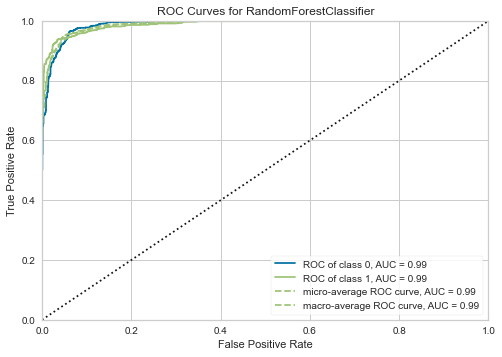

In [296]:
plot_model(tuned_rf, plot='auc')

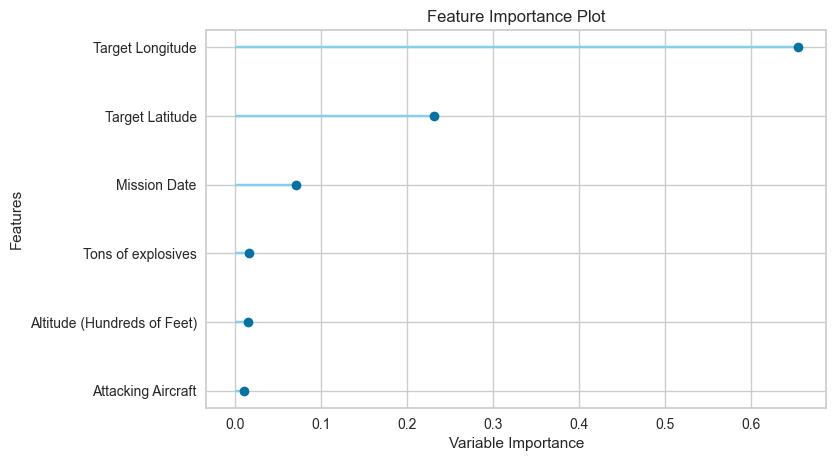

In [297]:
plot_model(tuned_rf, plot='feature')

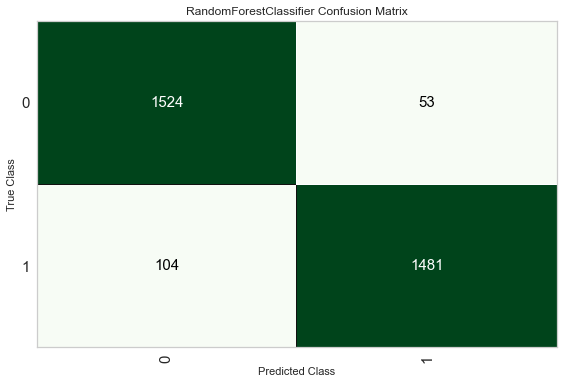

In [298]:
plot_model(tuned_rf, plot='confusion_matrix')

In [299]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…